# Assignment 2 Question 1 - Binary Classification with Custom Naive Bayes

## Objective
The objective of this assignment is to develop a binary classification model utilizing the Naive Bayes algorithm. Through this task, students will acquire practical skills in various stages of machine learning, including data loading, preprocessing, visualization, and model evaluation. By leveraging statistical principles, the aim is to construct an efficient classifier for the given dataset.

## Key Components
1. **Data Loading:** Students will learn to load the dataset into their environment, understanding its structure and variables.
2. **Preprocessing:** Various preprocessing techniques will be applied to clean and prepare the data for modeling, ensuring its quality and relevance.
3. **Visualization:** Utilizing visualization tools and techniques, students will explore the data to gain insights and identify patterns that can aid in model development.
4. **Model Development:** Implementing the Naive Bayes algorithm, students will build a binary classification model tailored to the dataset, considering its specific characteristics and requirements.
5. **Model Evaluation:** Finally, the constructed model will be evaluated using appropriate metrics to assess its performance and effectiveness in classifying the data accurately.

## Learning Outcomes
- Hands-on experience in building a binary classification model.
- Proficiency in data preprocessing techniques.
- Ability to interpret and visualize data effectively.
- Understanding of the Naive Bayes algorithm and its application in classification tasks.
- Competence in evaluating model performance and selecting appropriate metrics.

Through this assignment, students will not only reinforce their theoretical knowledge but also develop practical skills essential for real-world machine learning applications.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno

import warnings

from ucimlrepo import fetch_ucirepo

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,
                             precision_recall_fscore_support, roc_auc_score)

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc

from imblearn.over_sampling import SVMSMOTE
from scipy.stats import pointbiserialr

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

## Data Loading and Preprocessing

## Objective
In this section, the focus is on loading the dataset from a provided URL into a suitable data structure, typically a pandas DataFrame. Additionally, the data will be cleaned by addressing missing values and normalizing numerical features as necessary. Finally, the dataset will be split into training and testing subsets to enable model evaluation.

## Steps to Accomplish
1. **Data Loading:**
   - Load the dataset from the provided URL.
   - Transform the dataset into a pandas DataFrame for easy manipulation and analysis.

2. **Data Cleaning:**
   - Identify and handle missing values in the dataset. This may involve imputation techniques or removal of rows/columns with missing data.
   - Normalize numerical features if required. Normalization ensures that all features contribute equally to the model and prevents dominance by certain features due to differences in scale.

3. **Dataset Splitting:**
   - Split the cleaned dataset into training and testing subsets. The training set is used to train the model, while the testing set is kept separate for evaluating the model's performance on unseen data.
   - A common split ratio is 80% for training and 20% for testing, but this can vary depending on the size and nature of the dataset.

In [2]:
myocardial_infarction_complications = fetch_ucirepo(id=579)

input_data = myocardial_infarction_complications.data.features
target_features = myocardial_infarction_complications.data.targets['ZSN']

input_data = input_data.drop(columns=['ZSN_A'])

feature_columns = input_data.columns
feature_description = myocardial_infarction_complications.variables

feature_description = feature_description[~(feature_description['name'] == 'ZSN_A')]
feature_description = feature_description[~(feature_description['role'] == 'Target')]

binary_features = feature_description[feature_description['type'] == 'Binary']['name'].values
categorical_features = feature_description[feature_description['type'] == 'Categorical']['name'].values
continuous_features = feature_description[feature_description['type'] == 'Continuous']['name'].values

feature_description.to_csv('./myocardial_infarction_complications_variable_description.csv', index=False)

In [3]:
binary_features, categorical_features, continuous_features

(array(['SEX', 'IBS_NASL', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02',
        'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05',
        'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
        'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03',
        'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST',
        'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01',
        'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07',
        'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
        'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08',
        'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03',
        'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
        'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11',
        'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',
        'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08',
      

In [4]:
binary_features.shape, categorical_features.shape, continuous_features.shape

((78,), (15,), (7,))

In [5]:
input_data

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [6]:
target_features

0       0
1       0
2       0
3       1
4       0
       ..
1695    0
1696    0
1697    0
1698    0
1699    0
Name: ZSN, Length: 1700, dtype: int64

<Axes: >

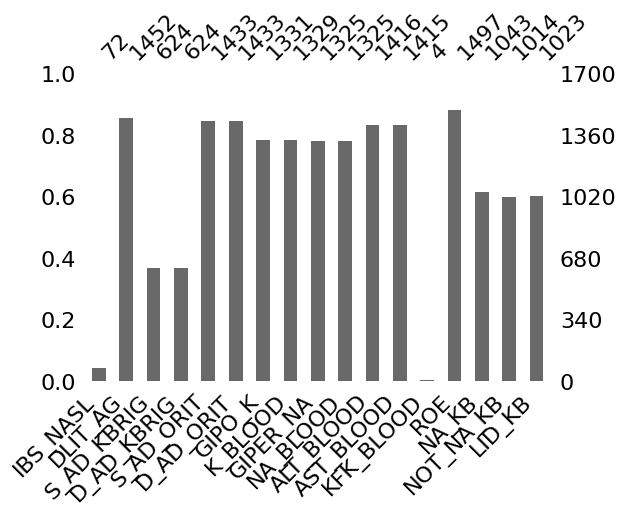

In [7]:
missing_thresh = 0.10
missingno.bar(input_data[input_data.columns[(input_data.isna().sum() / input_data.shape[0] >= missing_thresh)]], figsize=(6, 4))

In [8]:
input_data_subset = {}
missing_thresh = 0.10

features_to_drop = input_data.columns[(input_data.isna().sum() / input_data.shape[0] >= missing_thresh)]

feature_description = feature_description[~(feature_description['name'].isin(features_to_drop))]

binary_features = feature_description[feature_description['type'] == 'Binary']['name'].values
categorical_features = feature_description[feature_description['type'] == 'Categorical']['name'].values
continuous_features = feature_description[feature_description['type'] == 'Continuous']['name'].values

input_data_subset[f'input_data_{missing_thresh}'] = input_data[input_data.columns[~(input_data.isna().sum() / input_data.shape[0] >= missing_thresh)]]

In [9]:
binary_features, categorical_features, continuous_features

(array(['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04',
        'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08',
        'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03',
        'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04',
        'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST',
        'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01',
        'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07',
        'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
        'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08',
        'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03',
        'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
        'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11',
        'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',
        'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08',
        'NITR_S', 

In [10]:
binary_features.shape, categorical_features.shape, continuous_features.shape

((72,), (14,), (1,))

In [11]:
imputer_object_dict = {
    'simple_mean': SimpleImputer(),
    'simple_median': SimpleImputer(strategy='median'),
    'simple_most_frequent': SimpleImputer(strategy='most_frequent'),
    'knn': KNNImputer(n_neighbors=25, weights='distance'),
    'iterative': IterativeImputer(random_state=42),
}

imputed_data_dict = {}

for imputer_name, imputer_object in imputer_object_dict.items():
    print(f'Running Imputation Method: {imputer_name}')

    for data_key, data_value in input_data_subset.items():
        imputed_data_dict[f'{imputer_name}_{data_key}'] = pd.DataFrame(data=imputer_object.fit_transform(data_value), columns=data_value.columns)

Running Imputation Method: simple_mean
Running Imputation Method: simple_median
Running Imputation Method: simple_most_frequent
Running Imputation Method: knn
Running Imputation Method: iterative


In [12]:
for key, dataset in imputed_data_dict.items():
    print(f'{key} - Shape: {dataset.shape}')

simple_mean_input_data_0.1 - Shape: (1700, 93)
simple_median_input_data_0.1 - Shape: (1700, 93)
simple_most_frequent_input_data_0.1 - Shape: (1700, 93)
knn_input_data_0.1 - Shape: (1700, 93)
iterative_input_data_0.1 - Shape: (1700, 93)


In [13]:
scaler_object_dict = {
    'standard': StandardScaler(),
    'min_max': MinMaxScaler(),
    'robust': RobustScaler()
}

scaled_data_dict = {}

for scaler_name, scaler_object in scaler_object_dict.items():
    print(f'Running Scaling Method: {scaler_name}')

    for data_key, data_value in imputed_data_dict.items():
        scaled_data = pd.DataFrame(data=scaler_object.fit_transform(data_value), columns=data_value.columns)
        transformed_data = pd.DataFrame(data=PowerTransformer().fit_transform(data_value), columns=data_value.columns)

        scaled_data_dict[f'{scaler_name}_{data_key}'] = transformed_data

Running Scaling Method: standard
Running Scaling Method: min_max
Running Scaling Method: robust


In [14]:
for key, dataset in scaled_data_dict.items():
    print(f'{key} Shape: {dataset.shape}')

standard_simple_mean_input_data_0.1 Shape: (1700, 93)
standard_simple_median_input_data_0.1 Shape: (1700, 93)
standard_simple_most_frequent_input_data_0.1 Shape: (1700, 93)
standard_knn_input_data_0.1 Shape: (1700, 93)
standard_iterative_input_data_0.1 Shape: (1700, 93)
min_max_simple_mean_input_data_0.1 Shape: (1700, 93)
min_max_simple_median_input_data_0.1 Shape: (1700, 93)
min_max_simple_most_frequent_input_data_0.1 Shape: (1700, 93)
min_max_knn_input_data_0.1 Shape: (1700, 93)
min_max_iterative_input_data_0.1 Shape: (1700, 93)
robust_simple_mean_input_data_0.1 Shape: (1700, 93)
robust_simple_median_input_data_0.1 Shape: (1700, 93)
robust_simple_most_frequent_input_data_0.1 Shape: (1700, 93)
robust_knn_input_data_0.1 Shape: (1700, 93)
robust_iterative_input_data_0.1 Shape: (1700, 93)


In [15]:
split_data_dict = {}

for data_key, data_value in scaled_data_dict.items():
    if data_key not in split_data_dict.keys():
        split_data_dict[data_key] = {}

    X_train, X_test, y_train, y_test = train_test_split(data_value, target_features, test_size=0.2, stratify=target_features, random_state=42)

    split_data_dict[data_key] = {
        'X_train': X_train, 'y_train': y_train, 'X_test': X_test, 'y_test': y_test}

In [16]:
for key, dataset_dict in split_data_dict.items():
    print(f'{key}: X_train - {dataset_dict["X_train"].shape}, y_train - {dataset_dict["y_train"].shape}, X_test - {dataset_dict["X_test"].shape}, y_test - {dataset_dict["y_test"].shape}')

standard_simple_mean_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
standard_simple_median_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
standard_simple_most_frequent_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
standard_knn_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
standard_iterative_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
min_max_simple_mean_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
min_max_simple_median_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
min_max_simple_most_frequent_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
min_max_knn_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (

# Data Visualization

## Objective
The objective of this section is to gain insights into the dataset by generating visual plots such as histograms, bar charts, and box plots. These visualizations help in understanding the distribution and characteristics of the dataset. Additionally, the class distribution will be visualized to identify any class imbalances, and appropriate strategies such as resampling will be considered if necessary.

## Steps to Accomplish
1. **Generate Visual Plots:**
   - Utilize various types of visualizations such as histograms, bar charts, and box plots to explore the dataset.
   - Histograms provide insights into the distribution of numerical features, helping to identify outliers and understand the data spread.
   - Bar charts are useful for visualizing categorical variables and understanding their frequency distribution.
   - Box plots offer a visual summary of the distribution of numerical data and help in identifying outliers and understanding the variability within different categories.

2. **Visualize Class Distribution:**
   - Plot the class distribution to visualize the balance or imbalance between different classes in the dataset.
   - Class imbalance occurs when one class has significantly more samples than the other, which can affect the model's performance.
   - Strategies such as resampling (e.g., oversampling minority class, undersampling majority class) may be considered to address class imbalance if necessary.

In [17]:
for key, dataset in input_data_subset.items():
    print(f'{key} Shape: {dataset.shape}')

input_data_0.1 Shape: (1700, 93)


In [18]:
for key, dataset in imputed_data_dict.items():
    print(f'{key} Shape: {dataset.shape}')

simple_mean_input_data_0.1 Shape: (1700, 93)
simple_median_input_data_0.1 Shape: (1700, 93)
simple_most_frequent_input_data_0.1 Shape: (1700, 93)
knn_input_data_0.1 Shape: (1700, 93)
iterative_input_data_0.1 Shape: (1700, 93)


In [19]:
binary_features, categorical_features, continuous_features

(array(['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04',
        'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08',
        'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03',
        'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04',
        'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST',
        'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01',
        'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07',
        'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
        'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08',
        'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03',
        'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
        'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11',
        'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',
        'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08',
        'NITR_S', 

In [20]:
def plot_histogram(data_dict: dict, feature_name: str, n_rows: int = 1, n_cols: int = 6, figsize: tuple = (25, 3)):
    _, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)

    for key in data_dict.keys():
        idx, data_type = key.split('-')
        idx = int(idx)

        ax[idx].hist(data_dict[key], edgecolor='black')
        ax[idx].set_title(f'{" ".join(data_type.split("_")[:2])} ({feature_name})')
        ax[idx].set_xlabel('Value')
        ax[idx].set_ylabel('Frequency')

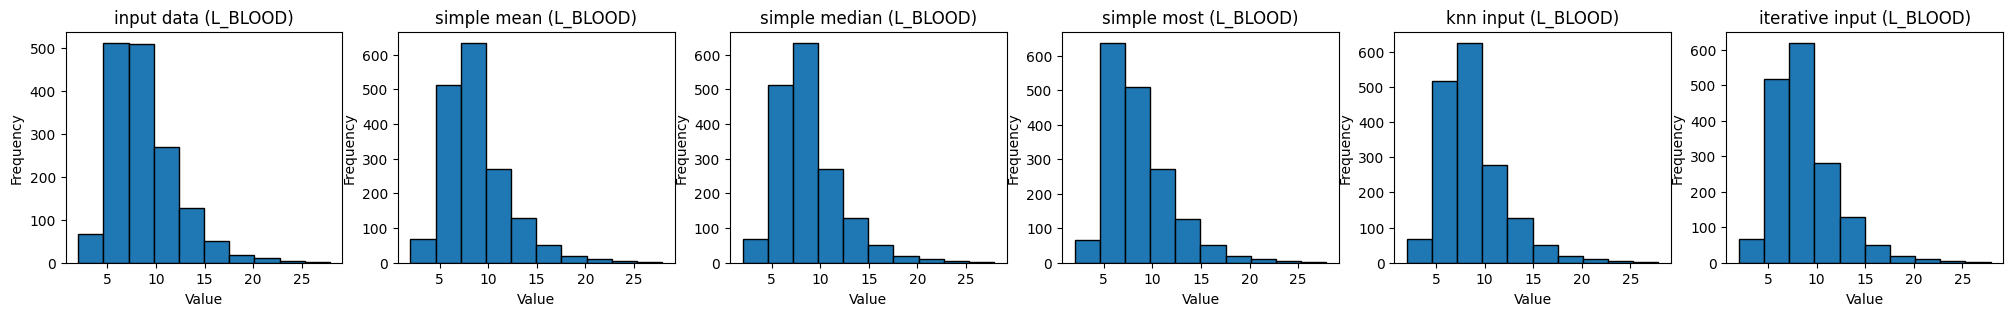

In [21]:
for feature in continuous_features[:5]:
    plot_data_dict = {
        f'0-input_data_{missing_thresh}': input_data_subset[f'input_data_{missing_thresh}'][feature],
        f'1-simple_mean_input_data_{missing_thresh}': imputed_data_dict[f'simple_mean_input_data_{missing_thresh}'][feature],
        f'2-simple_median_input_data_{missing_thresh}': imputed_data_dict[f'simple_median_input_data_{missing_thresh}'][feature],
        f'3-simple_most_frequent_input_data_{missing_thresh}': imputed_data_dict[f'simple_most_frequent_input_data_{missing_thresh}'][feature],
        f'4-knn_input_data_{missing_thresh}': imputed_data_dict[f'knn_input_data_{missing_thresh}'][feature],
        f'5-iterative_input_data_{missing_thresh}': imputed_data_dict[f'iterative_input_data_{missing_thresh}'][feature],
    }

    plot_histogram(data_dict=plot_data_dict, feature_name=feature)

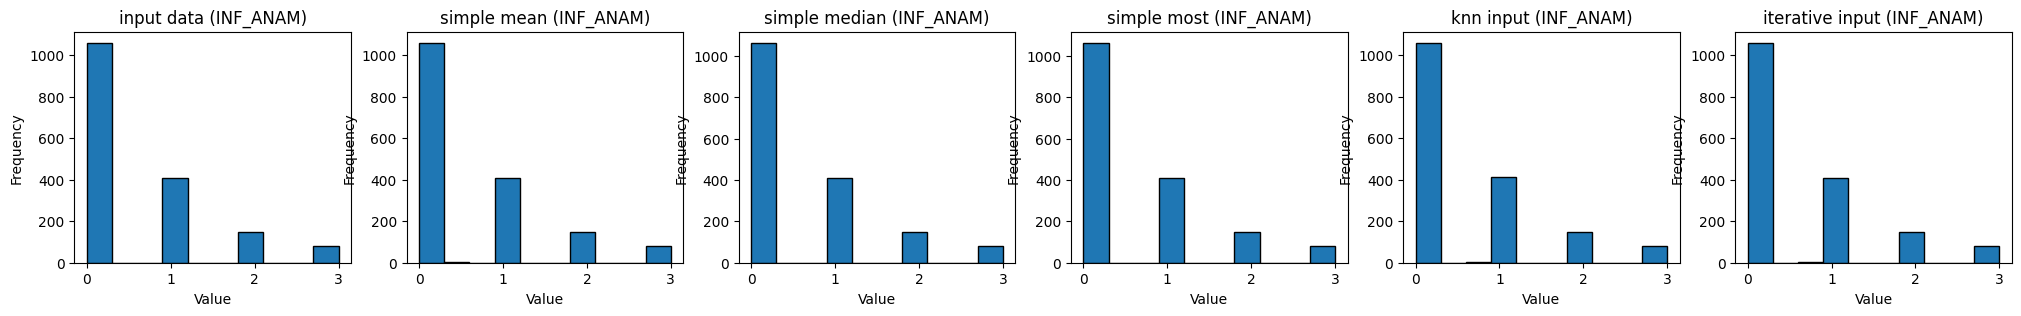

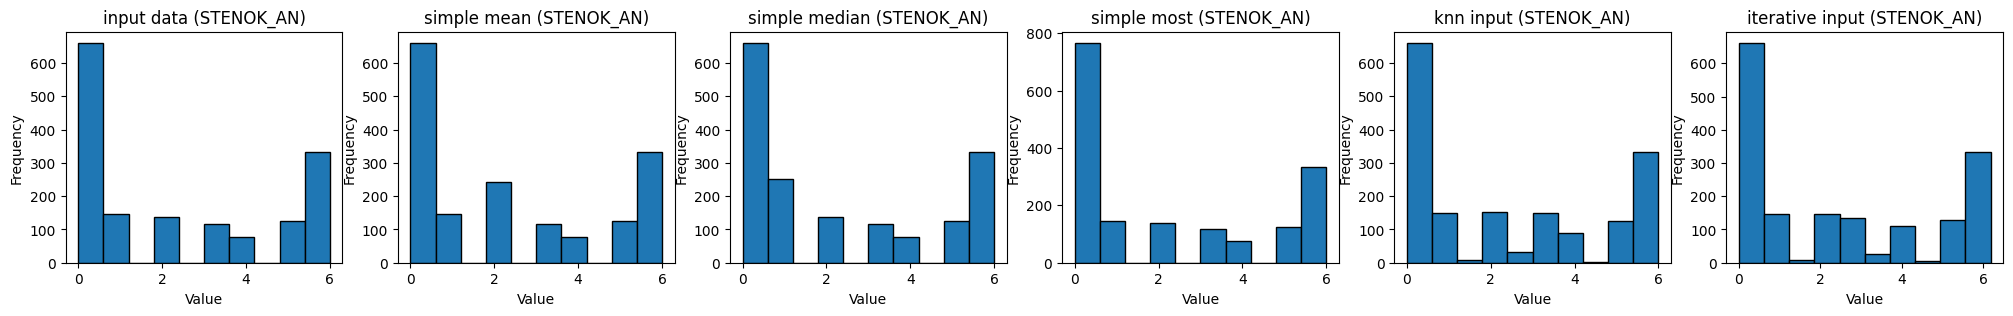

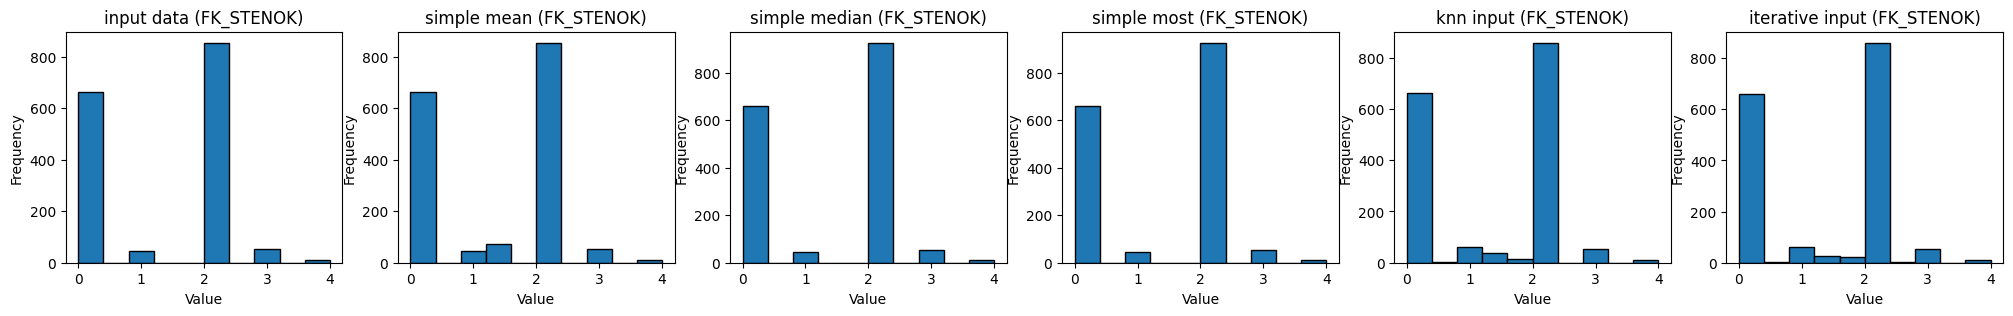

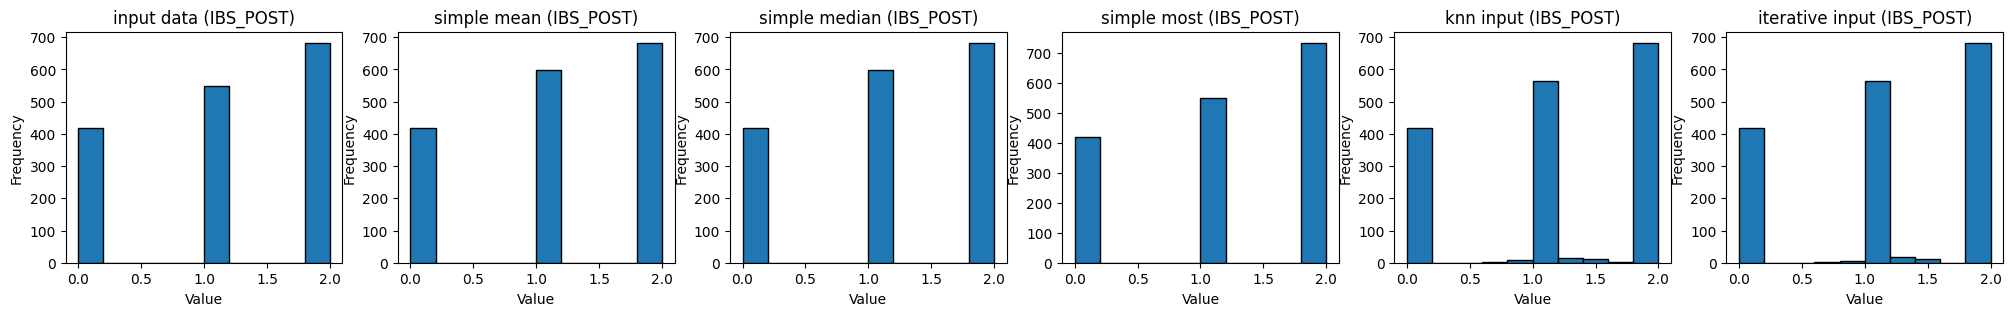

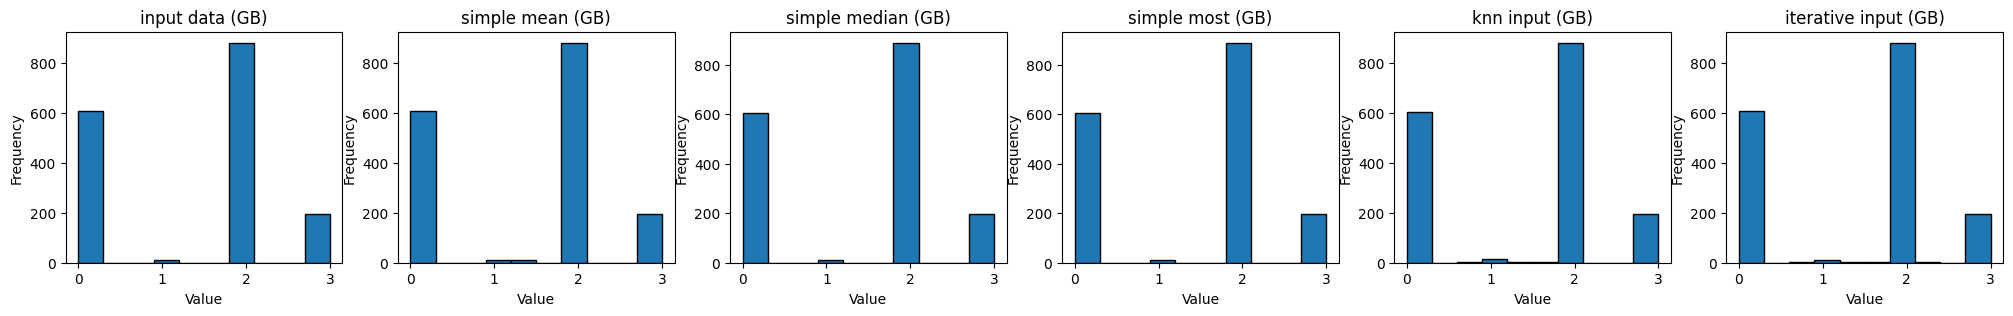

In [22]:
for feature in categorical_features[:5]:
    plot_data_dict = {
        f'0-input_data_{missing_thresh}': input_data_subset[f'input_data_{missing_thresh}'][feature],
        f'1-simple_mean_input_data_{missing_thresh}': imputed_data_dict[f'simple_mean_input_data_{missing_thresh}'][feature],
        f'2-simple_median_input_data_{missing_thresh}': imputed_data_dict[f'simple_median_input_data_{missing_thresh}'][feature],
        f'3-simple_most_frequent_input_data_{missing_thresh}': imputed_data_dict[f'simple_most_frequent_input_data_{missing_thresh}'][feature],
        f'4-knn_input_data_{missing_thresh}': imputed_data_dict[f'knn_input_data_{missing_thresh}'][feature],
        f'5-iterative_input_data_{missing_thresh}': imputed_data_dict[f'iterative_input_data_{missing_thresh}'][feature],
    }

    plot_histogram(data_dict=plot_data_dict, feature_name=feature)

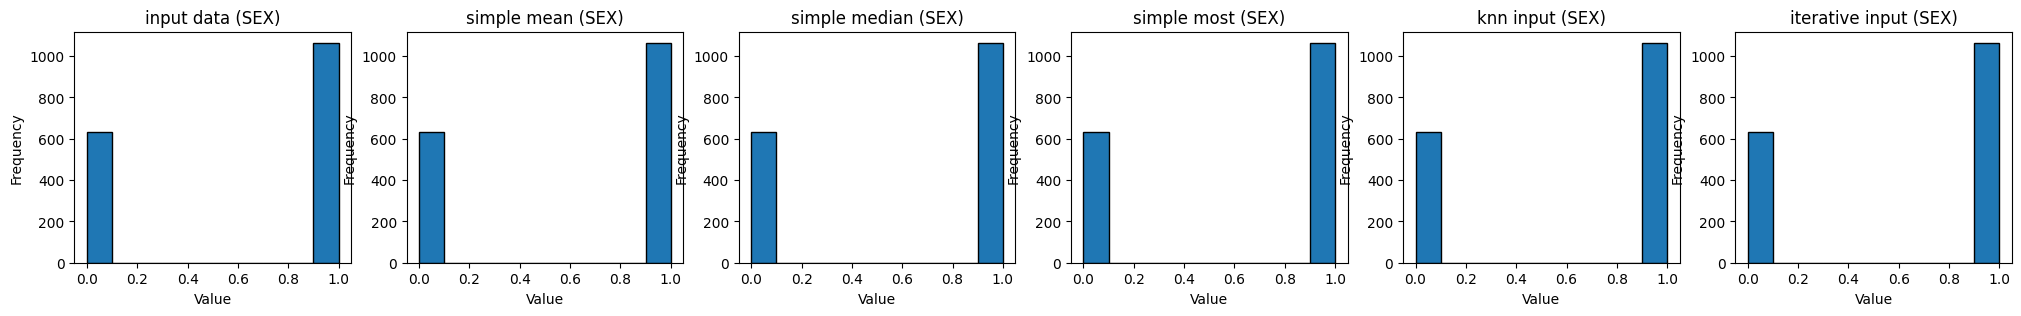

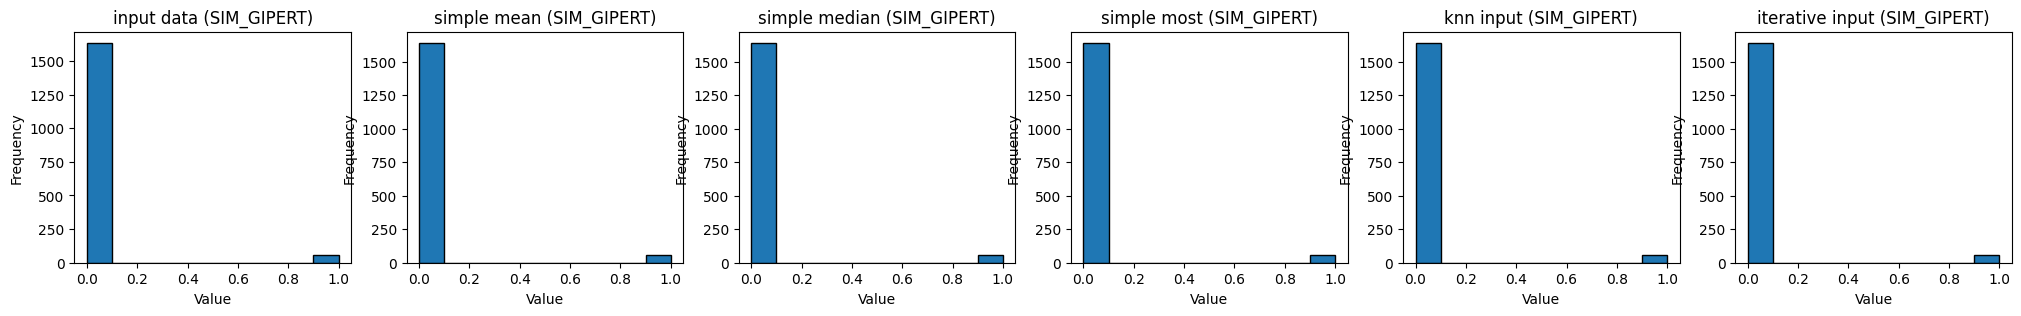

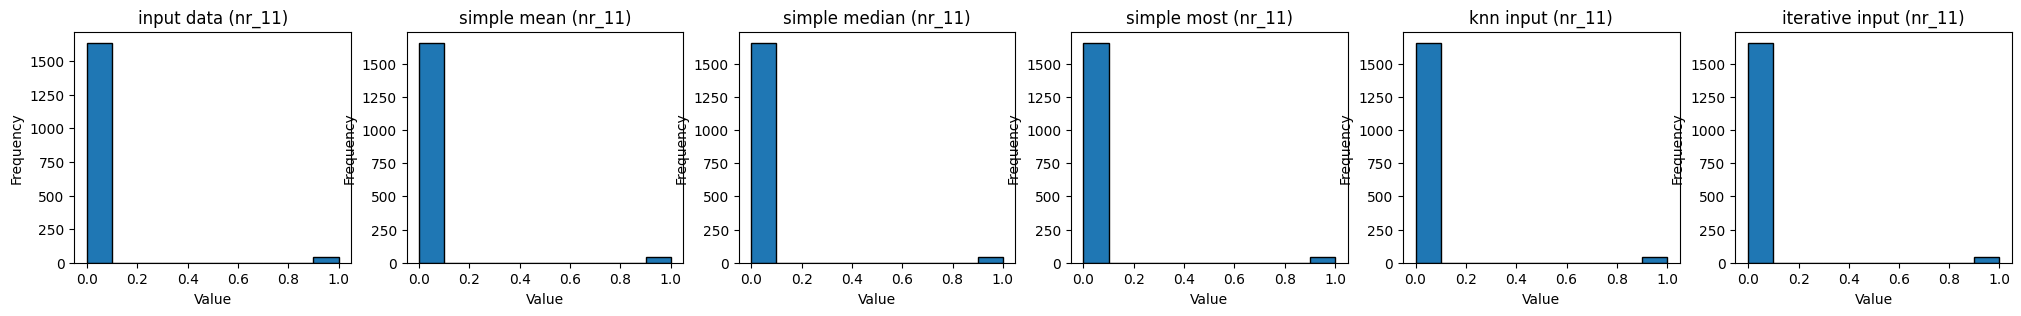

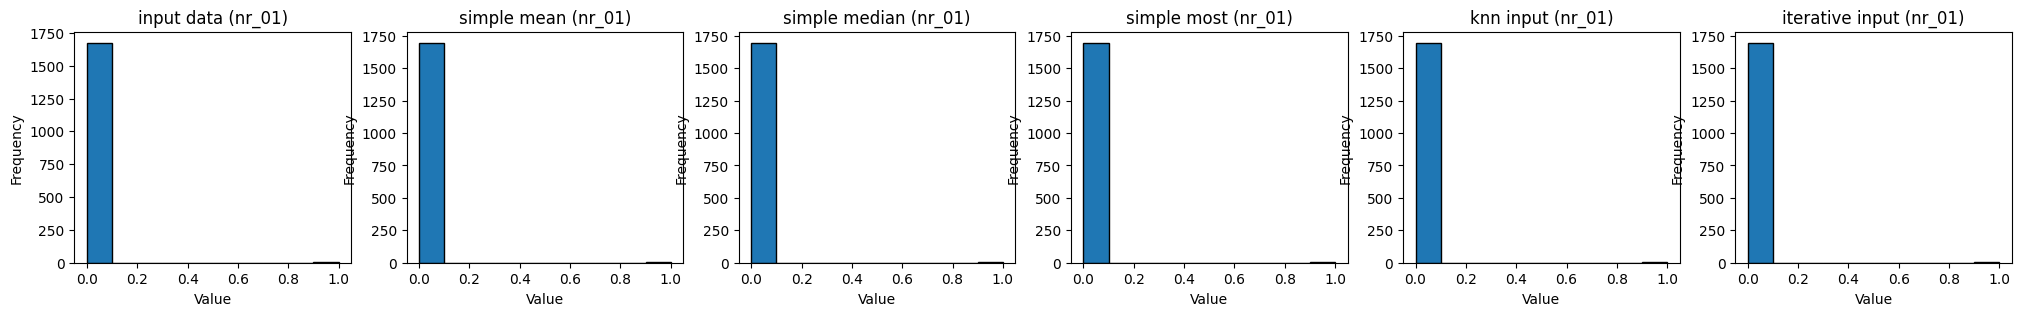

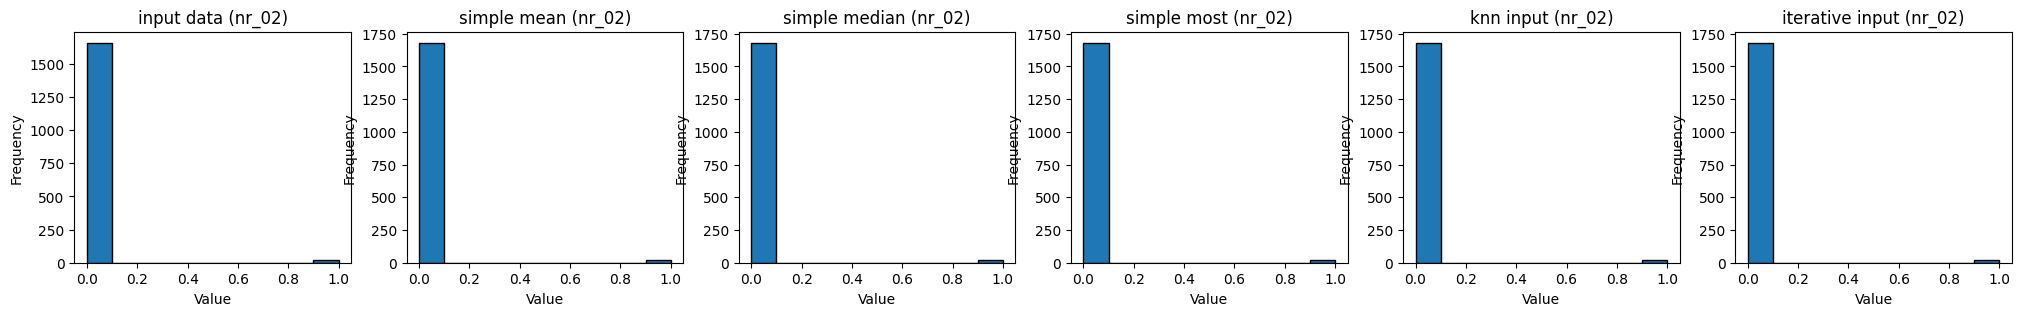

In [23]:
for feature in binary_features[:5]:
    plot_data_dict = {
        f'0-input_data_{missing_thresh}': input_data_subset[f'input_data_{missing_thresh}'][feature],
        f'1-simple_mean_input_data_{missing_thresh}': imputed_data_dict[f'simple_mean_input_data_{missing_thresh}'][feature],
        f'2-simple_median_input_data_{missing_thresh}': imputed_data_dict[f'simple_median_input_data_{missing_thresh}'][feature],
        f'3-simple_most_frequent_input_data_{missing_thresh}': imputed_data_dict[f'simple_most_frequent_input_data_{missing_thresh}'][feature],
        f'4-knn_input_data_{missing_thresh}': imputed_data_dict[f'knn_input_data_{missing_thresh}'][feature],
        f'5-iterative_input_data_{missing_thresh}': imputed_data_dict[f'iterative_input_data_{missing_thresh}'][feature],
    }

    plot_histogram(data_dict=plot_data_dict, feature_name=feature)

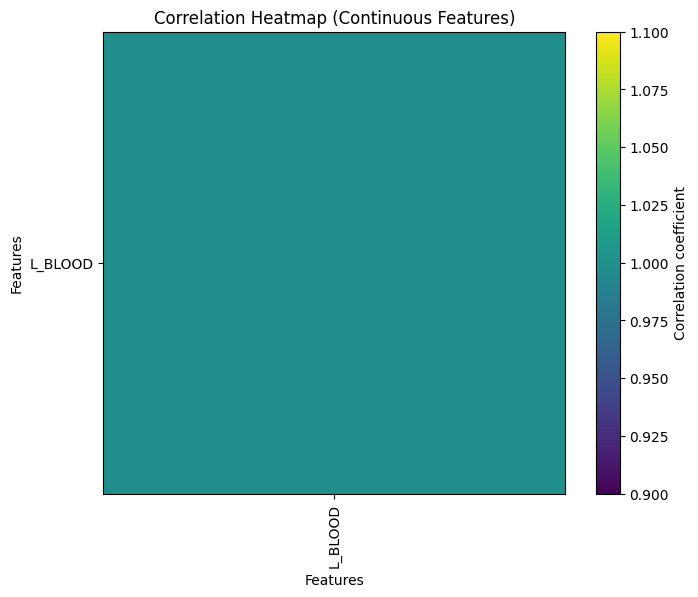

In [24]:
data = input_data_subset[f'input_data_{missing_thresh}'][continuous_features]

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar(label='Correlation coefficient')
plt.title('Correlation Heatmap (Continuous Features)')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

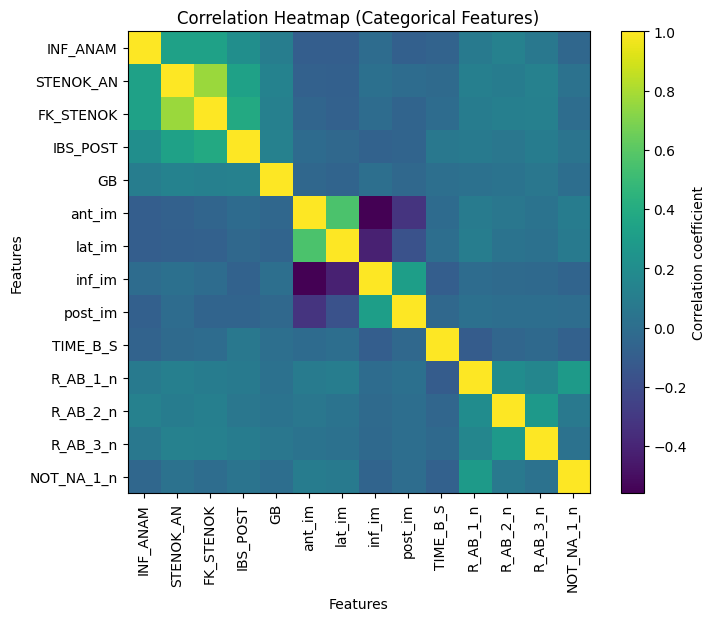

In [25]:
data = input_data_subset[f'input_data_{missing_thresh}'][categorical_features]

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar(label='Correlation coefficient')
plt.title('Correlation Heatmap (Categorical Features)')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [26]:
binary_features.shape

(72,)

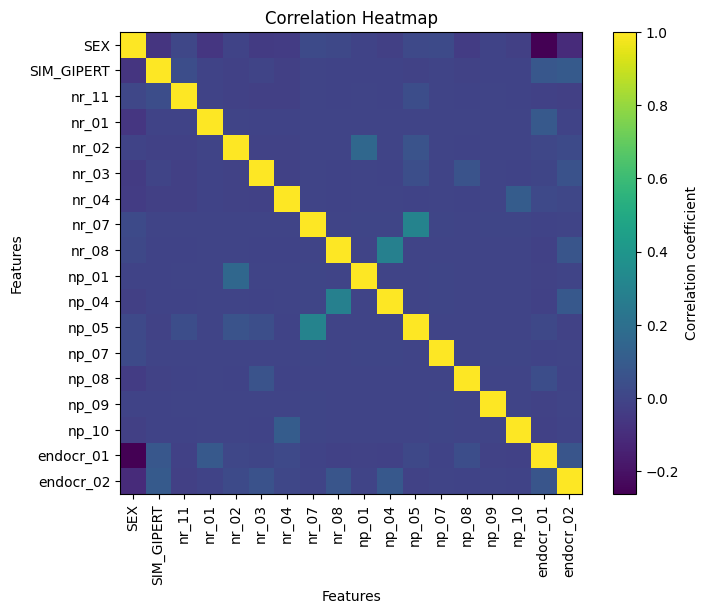

In [27]:
data = input_data_subset[f'input_data_{missing_thresh}'][binary_features[:18]]

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar(label='Correlation coefficient')
plt.title('Correlation Heatmap')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

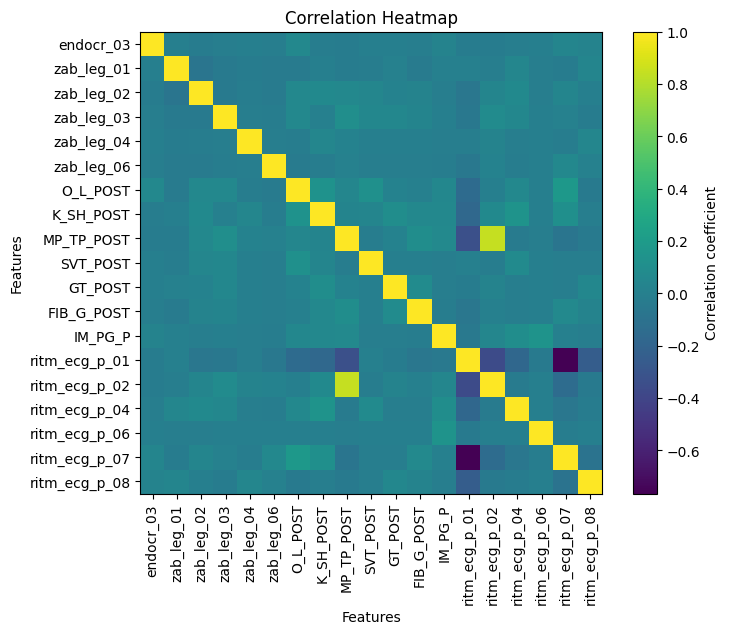

In [28]:
data = input_data_subset[f'input_data_{missing_thresh}'][binary_features[18:37]]

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar(label='Correlation coefficient')
plt.title('Correlation Heatmap')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

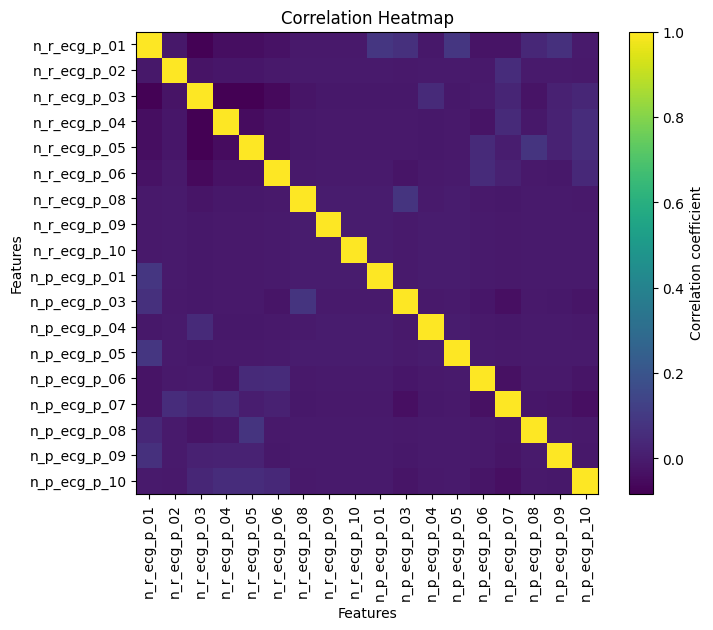

In [29]:
data = input_data_subset[f'input_data_{missing_thresh}'][binary_features[37:55]]

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar(label='Correlation coefficient')
plt.title('Correlation Heatmap')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

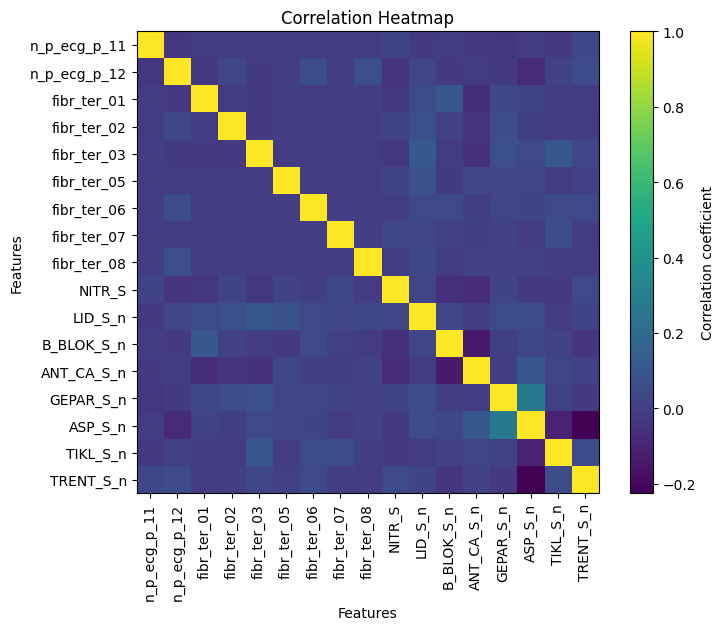

In [30]:
data = input_data_subset[f'input_data_{missing_thresh}'][binary_features[55:]]

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis')
plt.colorbar(label='Correlation coefficient')
plt.title('Correlation Heatmap')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [31]:
target_features.value_counts()

ZSN
0    1306
1     394
Name: count, dtype: int64

In [32]:
target_features.value_counts(normalize=True)

ZSN
0    0.768235
1    0.231765
Name: proportion, dtype: float64

# Binary Classification Model Development

## Objective
The primary goal of this section is to develop a binary classification model using the Naive Bayes classifier. Additionally, the model will be optimized through experimentation with various techniques such as feature selection and hyperparameter tuning.

## Steps to Accomplish
1. **Implement Naive Bayes Classifier:**
   - Utilize the Naive Bayes algorithm to build a binary classification model.
   - Naive Bayes is a probabilistic classifier that makes predictions based on the Bayes theorem with the assumption of independence between features.

2. **Optimize the Model:**
   - Experiment with different techniques to optimize the model's performance.
   - Feature Selection: Explore methods to identify and select the most relevant features that contribute to the model's predictive power. This may involve techniques such as univariate feature selection, recursive feature elimination, or feature importance ranking.
   - Hyperparameter Tuning: Fine-tune the hyperparameters of the Naive Bayes classifier to achieve better performance. This can be done through techniques such as grid search or random search, optimizing parameters like smoothing parameter (alpha) for Naive Bayes.

In [33]:
for key, dataset_dict in split_data_dict.items():
    print(f'{key}: X_train - {dataset_dict["X_train"].shape}, y_train - {dataset_dict["y_train"].shape}, X_test - {dataset_dict["X_test"].shape}, y_test - {dataset_dict["y_test"].shape}')

standard_simple_mean_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
standard_simple_median_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
standard_simple_most_frequent_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
standard_knn_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
standard_iterative_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
min_max_simple_mean_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
min_max_simple_median_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
min_max_simple_most_frequent_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (340, 93), y_test - (340,)
min_max_knn_input_data_0.1: X_train - (1360, 93), y_train - (1360,), X_test - (

In [34]:
def drop_corr_features(data: pd.DataFrame, threshhold: float):
    corr_matrix = data.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    data = data.drop(columns=[column for column in upper.columns if any(upper[column] > threshhold)])
    feature_names = data.columns

    return (data, feature_names)

In [35]:
corr_thresh_dict = {}

for data_key, data_value in split_data_dict.items():
    if data_key not in corr_thresh_dict.keys():
        corr_thresh_dict[data_key] = {}

    train_data = data_value['X_train']
    test_data = data_value['X_test']

    train_data, features = drop_corr_features(data=train_data, threshhold=0.8)
    test_data = test_data[features]

    corr_thresh_dict[data_key]['X_train'] = train_data
    corr_thresh_dict[data_key]['X_test'] = test_data

    corr_thresh_dict[data_key]['y_train'] = data_value['y_train']
    corr_thresh_dict[data_key]['y_test'] = data_value['y_test']

In [36]:
for key, dataset_dict in corr_thresh_dict.items():
    print(f'{key}: X_train - {dataset_dict["X_train"].shape}, y_train - {dataset_dict["y_train"].shape}, X_test - {dataset_dict["X_test"].shape}, y_test - {dataset_dict["y_test"].shape}')

standard_simple_mean_input_data_0.1: X_train - (1360, 82), y_train - (1360,), X_test - (340, 82), y_test - (340,)
standard_simple_median_input_data_0.1: X_train - (1360, 91), y_train - (1360,), X_test - (340, 91), y_test - (340,)
standard_simple_most_frequent_input_data_0.1: X_train - (1360, 92), y_train - (1360,), X_test - (340, 92), y_test - (340,)
standard_knn_input_data_0.1: X_train - (1360, 92), y_train - (1360,), X_test - (340, 92), y_test - (340,)
standard_iterative_input_data_0.1: X_train - (1360, 91), y_train - (1360,), X_test - (340, 91), y_test - (340,)
min_max_simple_mean_input_data_0.1: X_train - (1360, 82), y_train - (1360,), X_test - (340, 82), y_test - (340,)
min_max_simple_median_input_data_0.1: X_train - (1360, 91), y_train - (1360,), X_test - (340, 91), y_test - (340,)
min_max_simple_most_frequent_input_data_0.1: X_train - (1360, 92), y_train - (1360,), X_test - (340, 92), y_test - (340,)
min_max_knn_input_data_0.1: X_train - (1360, 92), y_train - (1360,), X_test - (

In [37]:
data_subset = list(corr_thresh_dict.keys())
feature_before_corr = [data['X_train'].shape[1] for data in split_data_dict.values()]
feature_after_corr = [data['X_train'].shape[1] for data in corr_thresh_dict.values()]

pd.DataFrame({'Data Subset': data_subset, '# of Features Before': feature_before_corr, '# of Features After': feature_after_corr})

,Data Subset,# of Features Before,# of Features After
0,standard_simple_mean_input_data_0.1,93,82
1,standard_simple_median_input_data_0.1,93,91
2,standard_simple_most_frequent_input_data_0.1,93,92
3,standard_knn_input_data_0.1,93,92
4,standard_iterative_input_data_0.1,93,91
5,min_max_simple_mean_input_data_0.1,93,82
6,min_max_simple_median_input_data_0.1,93,91
7,min_max_simple_most_frequent_input_data_0.1,93,92
8,min_max_knn_input_data_0.1,93,92
9,min_max_iterative_input_data_0.1,93,91


In [38]:
def drop_pvalue_features(data_dict: dict):
    data_subset = data_dict['X_train']
    target = data_dict['y_train']
    point_biserial_coef_list = {'coef': [], 'p_value': []}

    for feat in data_subset.columns:
        coef, pvalue = pointbiserialr(data_subset[feat], target)

        point_biserial_coef_list['coef'].append(coef)
        point_biserial_coef_list['p_value'].append(pvalue)

    coef_dataframe = pd.DataFrame({'feature': data_subset.columns, 'corr_coef': point_biserial_coef_list['coef'], 'p_value': point_biserial_coef_list['p_value']})

    return coef_dataframe[coef_dataframe['p_value'] <= 0.05]['feature'].values

In [39]:
for data_key, data_value in corr_thresh_dict.items():
    train_data = data_value['X_train']
    test_data = data_value['X_test']

    features = drop_pvalue_features(data_dict=data_value)
    train_data = train_data[features]
    test_data = test_data[features]

    corr_thresh_dict[data_key]['X_train'] = train_data
    corr_thresh_dict[data_key]['X_test'] = test_data

    corr_thresh_dict[data_key]['y_train'] = data_value['y_train']
    corr_thresh_dict[data_key]['y_test'] = data_value['y_test']

In [40]:
for key, dataset_dict in corr_thresh_dict.items():
    print(f'{key}: X_train - {dataset_dict["X_train"].shape}')

standard_simple_mean_input_data_0.1: X_train - (1360, 19)
standard_simple_median_input_data_0.1: X_train - (1360, 24)
standard_simple_most_frequent_input_data_0.1: X_train - (1360, 24)
standard_knn_input_data_0.1: X_train - (1360, 21)
standard_iterative_input_data_0.1: X_train - (1360, 21)
min_max_simple_mean_input_data_0.1: X_train - (1360, 19)
min_max_simple_median_input_data_0.1: X_train - (1360, 24)
min_max_simple_most_frequent_input_data_0.1: X_train - (1360, 24)
min_max_knn_input_data_0.1: X_train - (1360, 21)
min_max_iterative_input_data_0.1: X_train - (1360, 21)
robust_simple_mean_input_data_0.1: X_train - (1360, 19)
robust_simple_median_input_data_0.1: X_train - (1360, 24)
robust_simple_most_frequent_input_data_0.1: X_train - (1360, 24)
robust_knn_input_data_0.1: X_train - (1360, 21)
robust_iterative_input_data_0.1: X_train - (1360, 21)


In [43]:
data_subset = list(corr_thresh_dict.keys())
raw_features = [data['X_train'].shape[1] for data in split_data_dict.values()]
feature_after_corr = [data['X_train'].shape[1] for data in corr_thresh_dict.values()]

pd.DataFrame({'Data Subset': data_subset, '# of Features Before': raw_features, '# of Features After': feature_after_corr})

,Data Subset,# of Features Before,# of Features After
0,standard_simple_mean_input_data_0.1,93,19
1,standard_simple_median_input_data_0.1,93,24
2,standard_simple_most_frequent_input_data_0.1,93,24
3,standard_knn_input_data_0.1,93,21
4,standard_iterative_input_data_0.1,93,21
5,min_max_simple_mean_input_data_0.1,93,19
6,min_max_simple_median_input_data_0.1,93,24
7,min_max_simple_most_frequent_input_data_0.1,93,24
8,min_max_knn_input_data_0.1,93,21
9,min_max_iterative_input_data_0.1,93,21


In [44]:
def drop_rfe_features(X_train: pd.DataFrame, y_train: np.ndarray, num_features: float):
    estimator = RandomForestClassifier(n_jobs=-1, random_state=42)
    selector = RFE(estimator, n_features_to_select=num_features).fit(X_train, y_train)

    data = X_train[X_train.columns[selector.support_]]
    feature_names = data.columns

    return (data, feature_names)

def sfs_features(X_train: pd.DataFrame, y_train: np.ndarray, num_features: float):
    estimator = RandomForestClassifier(n_jobs=-1, random_state=42)
    selector = SequentialFeatureSelector(estimator, n_features_to_select=num_features, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

    data = X_train[X_train.columns[selector.support_]]
    feature_names = data.columns

    return (data, feature_names)

In [45]:
rfe_dict = {}

for data_key, data_value in corr_thresh_dict.items():
    print(f'Running for: {data_key}')

    if data_key not in rfe_dict.keys():
        rfe_dict[data_key] = {}

    train_data = data_value['X_train']
    test_data = data_value['X_test']

    train_data, features = drop_rfe_features(X_train=train_data, y_train=data_value['y_train'], num_features=15)
    test_data = test_data[features]

    rfe_dict[data_key]['X_train'] = train_data
    rfe_dict[data_key]['X_test'] = test_data

    rfe_dict[data_key]['y_train'] = data_value['y_train']
    rfe_dict[data_key]['y_test'] = data_value['y_test']

Running for: standard_simple_mean_input_data_0.1
Running for: standard_simple_median_input_data_0.1
Running for: standard_simple_most_frequent_input_data_0.1
Running for: standard_knn_input_data_0.1
Running for: standard_iterative_input_data_0.1
Running for: min_max_simple_mean_input_data_0.1
Running for: min_max_simple_median_input_data_0.1
Running for: min_max_simple_most_frequent_input_data_0.1
Running for: min_max_knn_input_data_0.1
Running for: min_max_iterative_input_data_0.1
Running for: robust_simple_mean_input_data_0.1
Running for: robust_simple_median_input_data_0.1
Running for: robust_simple_most_frequent_input_data_0.1
Running for: robust_knn_input_data_0.1
Running for: robust_iterative_input_data_0.1


In [46]:
sfs_dict = {}

for data_key, data_value in corr_thresh_dict.items():
    print(f'Running for: {data_key}')

    if data_key not in sfs_dict.keys():
        sfs_dict[data_key] = {}

    train_data = data_value['X_train']
    test_data = data_value['X_test']

    train_data, features = sfs_features(X_train=train_data, y_train=data_value['y_train'], num_features=15)
    test_data = test_data[features]

    sfs_dict[data_key]['X_train'] = train_data
    sfs_dict[data_key]['X_test'] = test_data

    sfs_dict[data_key]['y_train'] = data_value['y_train']
    sfs_dict[data_key]['y_test'] = data_value['y_test']

Running for: standard_simple_mean_input_data_0.1
Running for: standard_simple_median_input_data_0.1
Running for: standard_simple_most_frequent_input_data_0.1
Running for: standard_knn_input_data_0.1
Running for: standard_iterative_input_data_0.1
Running for: min_max_simple_mean_input_data_0.1
Running for: min_max_simple_median_input_data_0.1
Running for: min_max_simple_most_frequent_input_data_0.1
Running for: min_max_knn_input_data_0.1
Running for: min_max_iterative_input_data_0.1
Running for: robust_simple_mean_input_data_0.1
Running for: robust_simple_median_input_data_0.1
Running for: robust_simple_most_frequent_input_data_0.1
Running for: robust_knn_input_data_0.1
Running for: robust_iterative_input_data_0.1


In [48]:
for key, dataset_dict in sfs_dict.items():
    print(f'{key}: X_train - {dataset_dict["X_train"].shape}, y_train - {dataset_dict["y_train"].shape}, X_test - {dataset_dict["X_test"].shape}, y_test - {dataset_dict["y_test"].shape}')

standard_simple_mean_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
standard_simple_median_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
standard_simple_most_frequent_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
standard_knn_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
standard_iterative_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
min_max_simple_mean_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
min_max_simple_median_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
min_max_simple_most_frequent_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
min_max_knn_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (

In [49]:
for key, dataset_dict in rfe_dict.items():
    print(f'{key}: X_train - {dataset_dict["X_train"].shape}, y_train - {dataset_dict["y_train"].shape}, X_test - {dataset_dict["X_test"].shape}, y_test - {dataset_dict["y_test"].shape}')

standard_simple_mean_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
standard_simple_median_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
standard_simple_most_frequent_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
standard_knn_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
standard_iterative_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
min_max_simple_mean_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
min_max_simple_median_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
min_max_simple_most_frequent_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (340, 15), y_test - (340,)
min_max_knn_input_data_0.1: X_train - (1360, 15), y_train - (1360,), X_test - (

In [59]:
pca_reduced_dict = {}

for data_key, data_value in sfs_dict.items():
    print(f'Running for: {data_key}')

    if data_key not in pca_reduced_dict.keys():
        pca_reduced_dict[data_key] = {}

    train_data = data_value['X_train']
    test_data = data_value['X_test']

    pca_object = PCA(n_components=10, random_state=42)

    train_data = pca_object.fit_transform(X=train_data)
    test_data = pca_object.transform(test_data)

    pca_reduced_dict[data_key]['X_train'] = train_data
    pca_reduced_dict[data_key]['X_test'] = test_data

    pca_reduced_dict[data_key]['y_train'] = data_value['y_train']
    pca_reduced_dict[data_key]['y_test'] = data_value['y_test']

Running for: standard_simple_mean_input_data_0.1
Running for: standard_simple_median_input_data_0.1
Running for: standard_simple_most_frequent_input_data_0.1
Running for: standard_knn_input_data_0.1
Running for: standard_iterative_input_data_0.1
Running for: min_max_simple_mean_input_data_0.1
Running for: min_max_simple_median_input_data_0.1
Running for: min_max_simple_most_frequent_input_data_0.1
Running for: min_max_knn_input_data_0.1
Running for: min_max_iterative_input_data_0.1
Running for: robust_simple_mean_input_data_0.1
Running for: robust_simple_median_input_data_0.1
Running for: robust_simple_most_frequent_input_data_0.1
Running for: robust_knn_input_data_0.1
Running for: robust_iterative_input_data_0.1


In [60]:
for key, dataset_dict in pca_reduced_dict.items():
    print(f'{key}: X_train - {dataset_dict["X_train"].shape}, y_train - {dataset_dict["y_train"].shape}, X_test - {dataset_dict["X_test"].shape}, y_test - {dataset_dict["y_test"].shape}')

standard_simple_mean_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (340, 10), y_test - (340,)
standard_simple_median_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (340, 10), y_test - (340,)
standard_simple_most_frequent_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (340, 10), y_test - (340,)
standard_knn_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (340, 10), y_test - (340,)
standard_iterative_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (340, 10), y_test - (340,)
min_max_simple_mean_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (340, 10), y_test - (340,)
min_max_simple_median_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (340, 10), y_test - (340,)
min_max_simple_most_frequent_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (340, 10), y_test - (340,)
min_max_knn_input_data_0.1: X_train - (1360, 10), y_train - (1360,), X_test - (

In [64]:
classifier_dict = {}

for data_key, dataset_dict in rfe_dict.items():
    print(f'Running for: {data_key}')

    if data_key not in classifier_dict.keys():
        classifier_dict[data_key] = {}

    sampling_method = SVMSMOTE(random_state=42, k_neighbors=10)
    X_resampled, y_resampled = sampling_method.fit_resample(dataset_dict['X_train'], dataset_dict['y_train'])

    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(X_resampled, y_resampled)

    classifier_dict[data_key]['model_object'] = naive_bayes_classifier

    classifier_dict[data_key]['X_train'] = X_resampled
    classifier_dict[data_key]['y_train'] = y_resampled
    classifier_dict[data_key]['X_test'] = dataset_dict['X_test']
    classifier_dict[data_key]['y_test'] = dataset_dict['y_test']

Running for: standard_simple_mean_input_data_0.1
Running for: standard_simple_median_input_data_0.1
Running for: standard_simple_most_frequent_input_data_0.1
Running for: standard_knn_input_data_0.1
Running for: standard_iterative_input_data_0.1
Running for: min_max_simple_mean_input_data_0.1
Running for: min_max_simple_median_input_data_0.1
Running for: min_max_simple_most_frequent_input_data_0.1
Running for: min_max_knn_input_data_0.1
Running for: min_max_iterative_input_data_0.1
Running for: robust_simple_mean_input_data_0.1
Running for: robust_simple_median_input_data_0.1
Running for: robust_simple_most_frequent_input_data_0.1
Running for: robust_knn_input_data_0.1
Running for: robust_iterative_input_data_0.1


In [65]:
for key, dataset_dict in classifier_dict.items():
    print(f'{key}: X_train - {dataset_dict["X_train"].shape}, y_train - {dataset_dict["y_train"].shape}, X_test - {dataset_dict["X_test"].shape}, y_test - {dataset_dict["y_test"].shape}')

standard_simple_mean_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (340, 15), y_test - (340,)
standard_simple_median_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (340, 15), y_test - (340,)
standard_simple_most_frequent_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (340, 15), y_test - (340,)
standard_knn_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (340, 15), y_test - (340,)
standard_iterative_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (340, 15), y_test - (340,)
min_max_simple_mean_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (340, 15), y_test - (340,)
min_max_simple_median_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (340, 15), y_test - (340,)
min_max_simple_most_frequent_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (340, 15), y_test - (340,)
min_max_knn_input_data_0.1: X_train - (2090, 15), y_train - (2090,), X_test - (

# Performance Analysis

## Objective
The objective of this section is to evaluate the classifier's performance using various metrics and visualization techniques. Metrics such as accuracy, precision, recall, F1 score, and ROC curve will be utilized to assess the classifier's effectiveness in binary classification tasks. Additionally, a confusion matrix will be drawn to gain insights into the classifier's true positives, true negatives, false positives, and false negatives.

## Steps to Accomplish
1. **Evaluate Classifier Using Metrics:**
   - Accuracy: Measures the proportion of correctly classified instances out of total instances.
   - Precision: Indicates the proportion of true positive predictions out of all positive predictions made.
   - Recall (Sensitivity): Measures the proportion of true positive instances that were correctly identified by the classifier.
   - F1 Score: Harmonic mean of precision and recall, providing a balance between the two metrics.
   - ROC Curve (Receiver Operating Characteristic Curve): Graphical representation of the true positive rate against the false positive rate at various threshold settings.

2. **Draw Confusion Matrix:**
   - A confusion matrix is a table that summarizes the performance of a classification model.
   - It consists of four elements: true positives, true negatives, false positives (Type I error), and false negatives (Type II error).
   - The diagonal elements of the confusion matrix represent correct predictions, while off-diagonal elements represent incorrect predictions.



Running for: standard_simple_mean_input_data_0.1

Train Accuracy Score: 0.681, Test Accuracy Score: 0.665
ROC Score: 0.619
Precision: 0.303, Recall: 0.342, F1-Score: 0.321

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       261
           1       0.30      0.34      0.32        79

    accuracy                           0.66       340
   macro avg       0.55      0.55      0.55       340
weighted avg       0.68      0.66      0.67       340



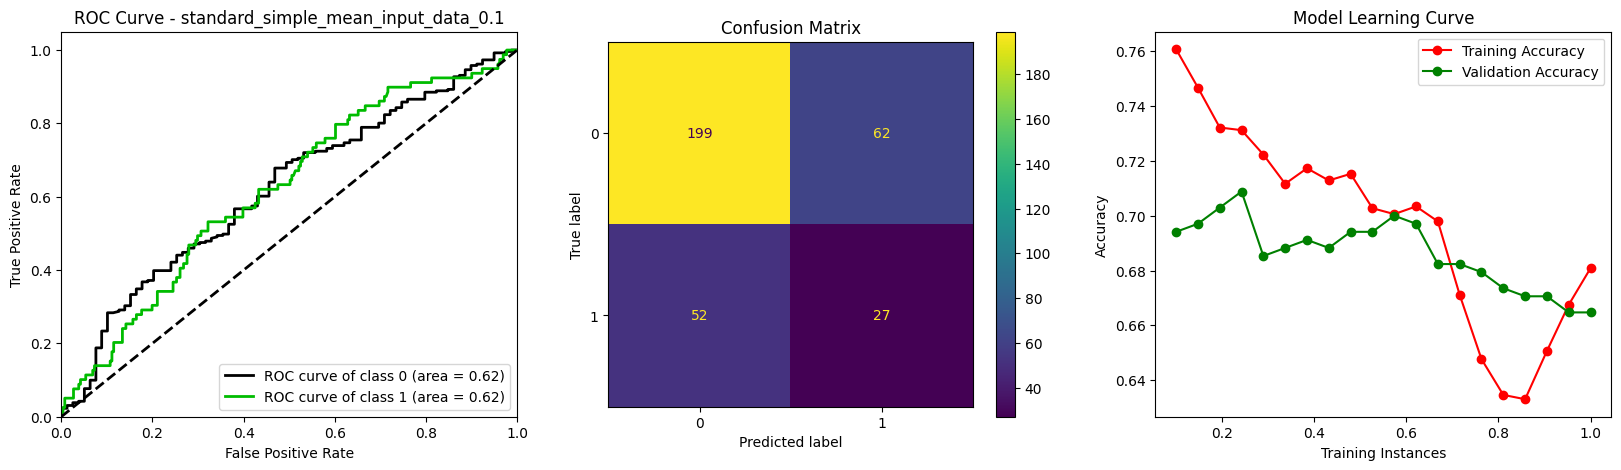

----------------------------------------------------------------------------------------------------
Running for: standard_simple_median_input_data_0.1

Train Accuracy Score: 0.686, Test Accuracy Score: 0.674
ROC Score: 0.603
Precision: 0.278, Recall: 0.253, F1-Score: 0.265

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       261
           1       0.28      0.25      0.26        79

    accuracy                           0.67       340
   macro avg       0.53      0.53      0.53       340
weighted avg       0.66      0.67      0.67       340



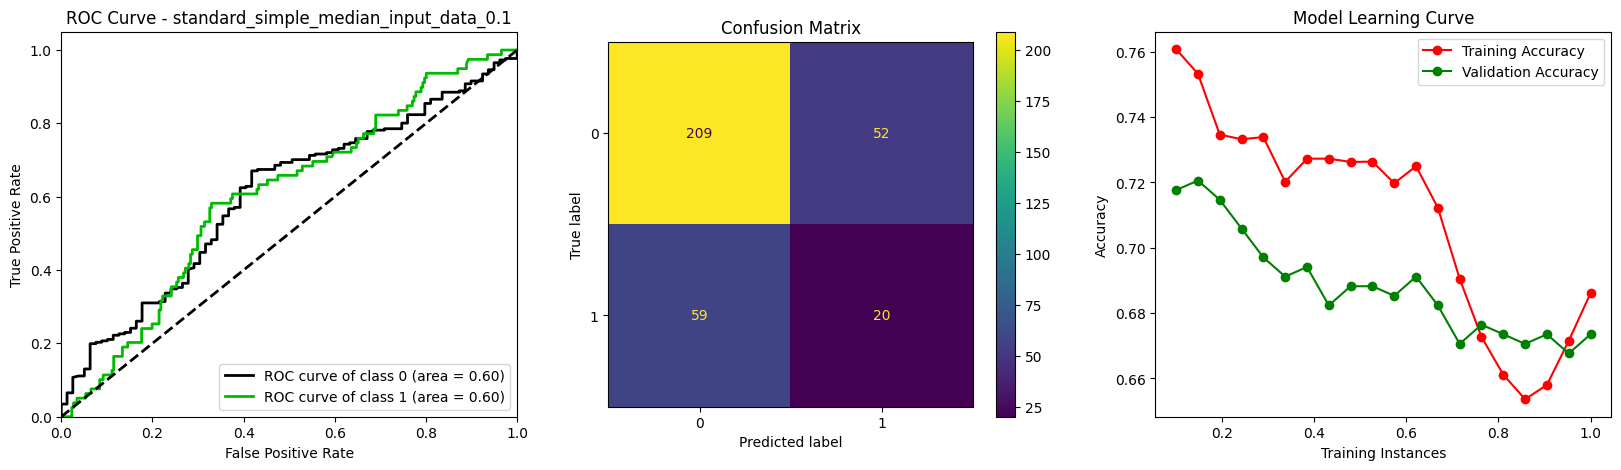

----------------------------------------------------------------------------------------------------
Running for: standard_simple_most_frequent_input_data_0.1

Train Accuracy Score: 0.686, Test Accuracy Score: 0.674
ROC Score: 0.603
Precision: 0.278, Recall: 0.253, F1-Score: 0.265

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       261
           1       0.28      0.25      0.26        79

    accuracy                           0.67       340
   macro avg       0.53      0.53      0.53       340
weighted avg       0.66      0.67      0.67       340



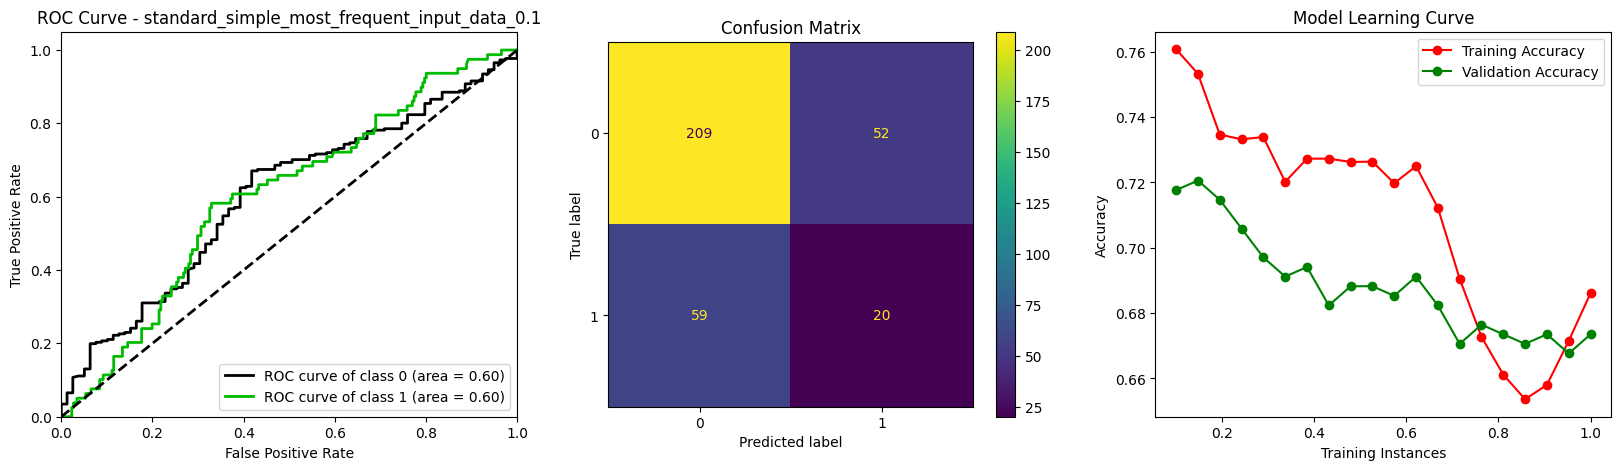

----------------------------------------------------------------------------------------------------
Running for: standard_knn_input_data_0.1

Train Accuracy Score: 0.674, Test Accuracy Score: 0.7
ROC Score: 0.59
Precision: 0.283, Recall: 0.19, F1-Score: 0.227

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       261
           1       0.28      0.19      0.23        79

    accuracy                           0.70       340
   macro avg       0.53      0.52      0.52       340
weighted avg       0.66      0.70      0.68       340



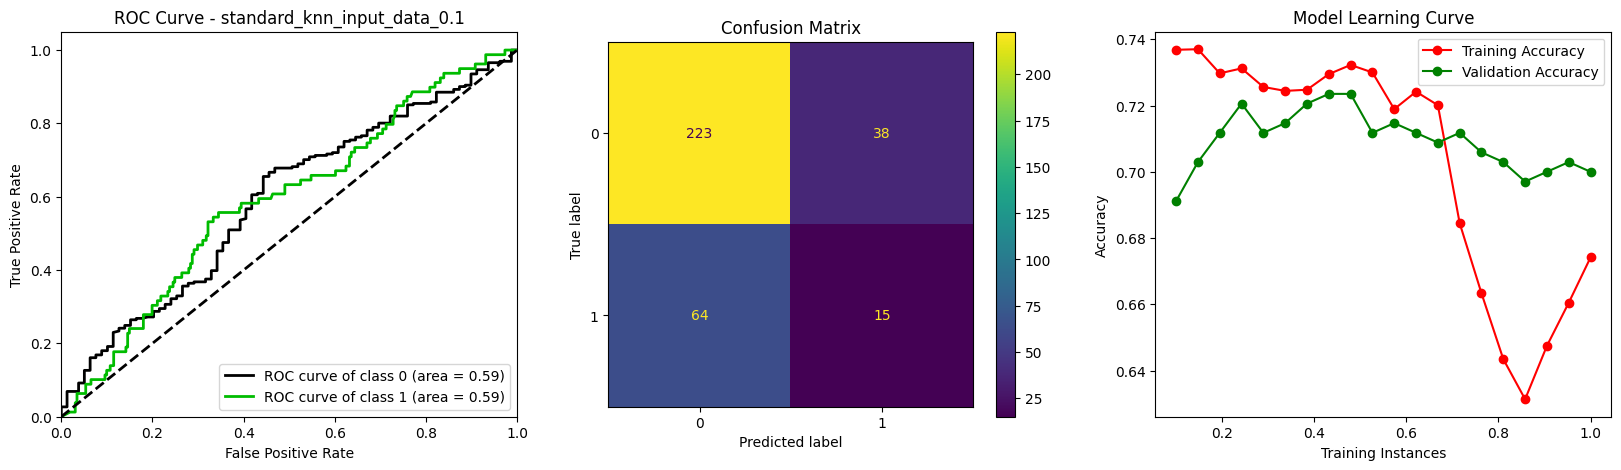

----------------------------------------------------------------------------------------------------
Running for: standard_iterative_input_data_0.1

Train Accuracy Score: 0.674, Test Accuracy Score: 0.703
ROC Score: 0.604
Precision: 0.323, Recall: 0.253, F1-Score: 0.284

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       261
           1       0.32      0.25      0.28        79

    accuracy                           0.70       340
   macro avg       0.56      0.55      0.55       340
weighted avg       0.68      0.70      0.69       340



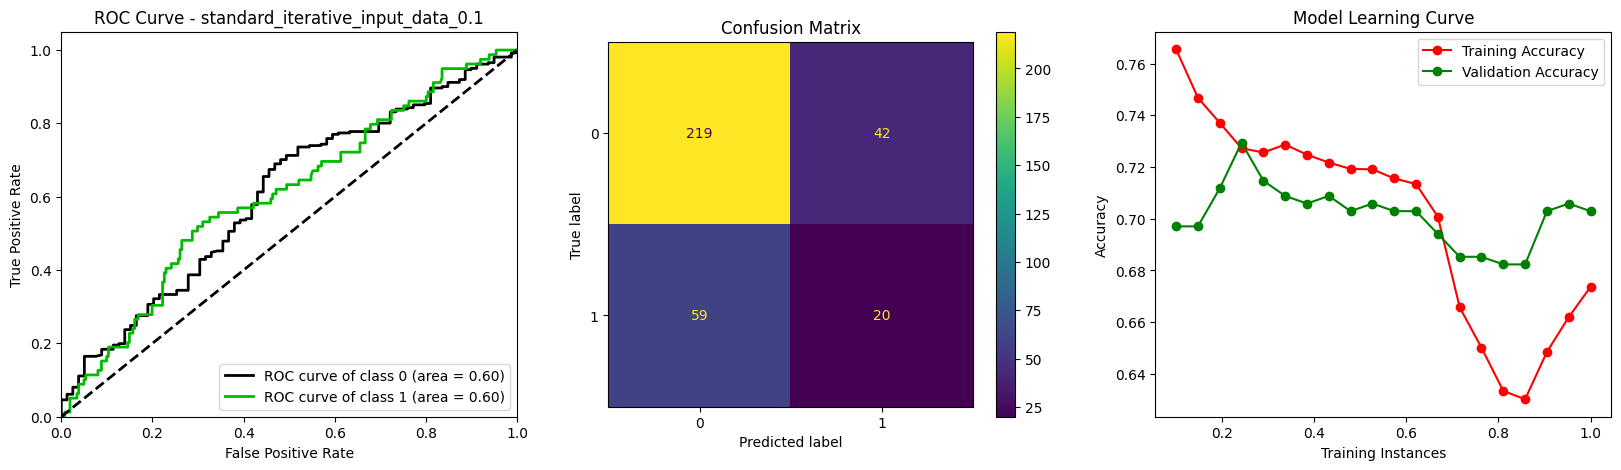

----------------------------------------------------------------------------------------------------
Running for: min_max_simple_mean_input_data_0.1

Train Accuracy Score: 0.681, Test Accuracy Score: 0.665
ROC Score: 0.619
Precision: 0.303, Recall: 0.342, F1-Score: 0.321

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       261
           1       0.30      0.34      0.32        79

    accuracy                           0.66       340
   macro avg       0.55      0.55      0.55       340
weighted avg       0.68      0.66      0.67       340



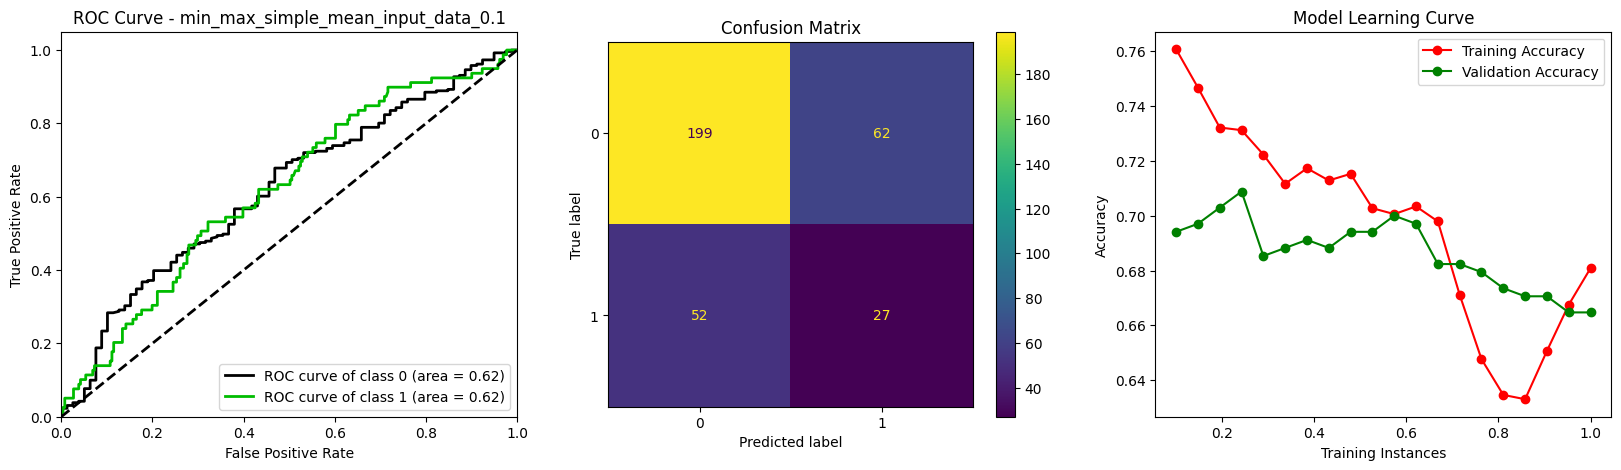

----------------------------------------------------------------------------------------------------
Running for: min_max_simple_median_input_data_0.1

Train Accuracy Score: 0.686, Test Accuracy Score: 0.674
ROC Score: 0.603
Precision: 0.278, Recall: 0.253, F1-Score: 0.265

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       261
           1       0.28      0.25      0.26        79

    accuracy                           0.67       340
   macro avg       0.53      0.53      0.53       340
weighted avg       0.66      0.67      0.67       340



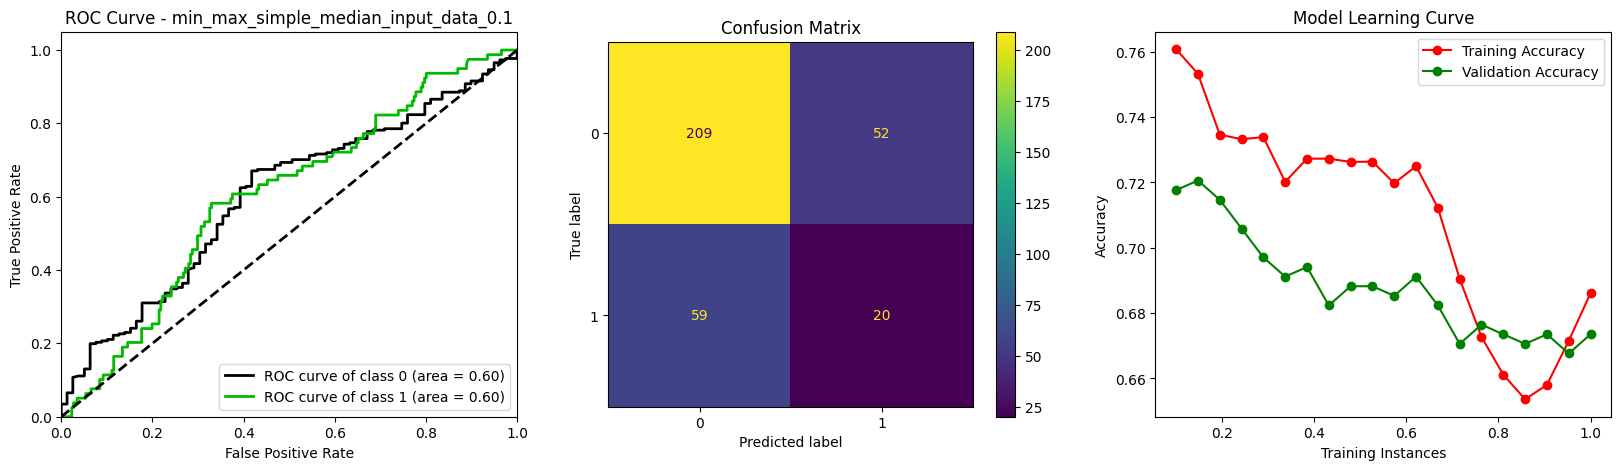

----------------------------------------------------------------------------------------------------
Running for: min_max_simple_most_frequent_input_data_0.1

Train Accuracy Score: 0.686, Test Accuracy Score: 0.674
ROC Score: 0.603
Precision: 0.278, Recall: 0.253, F1-Score: 0.265

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       261
           1       0.28      0.25      0.26        79

    accuracy                           0.67       340
   macro avg       0.53      0.53      0.53       340
weighted avg       0.66      0.67      0.67       340



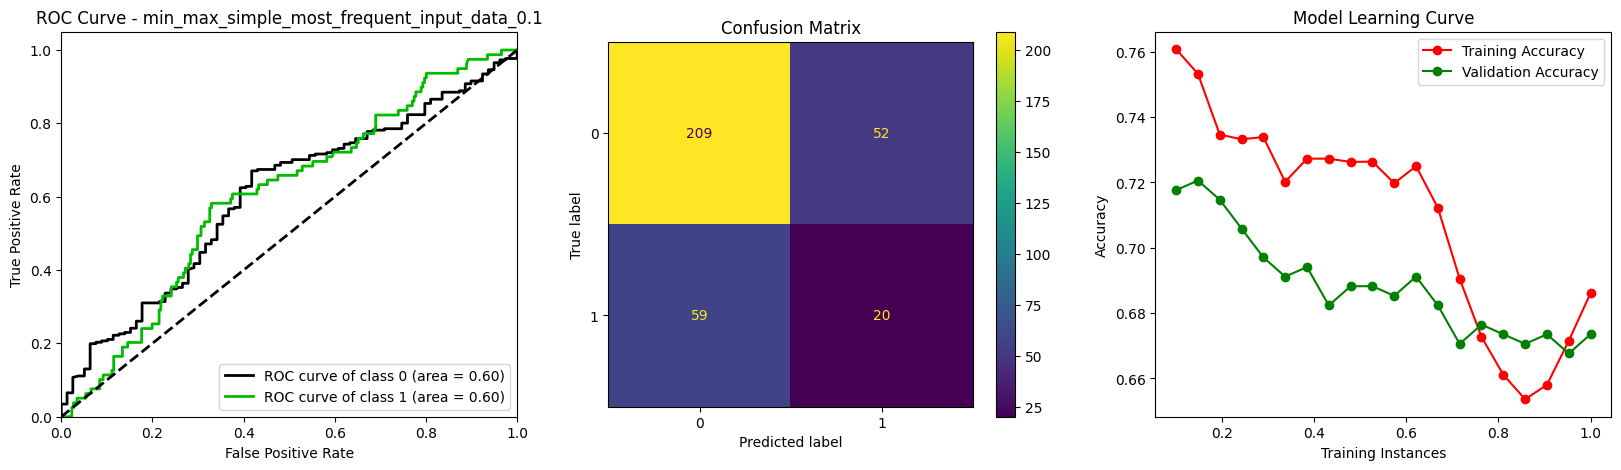

----------------------------------------------------------------------------------------------------
Running for: min_max_knn_input_data_0.1

Train Accuracy Score: 0.674, Test Accuracy Score: 0.7
ROC Score: 0.59
Precision: 0.283, Recall: 0.19, F1-Score: 0.227

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       261
           1       0.28      0.19      0.23        79

    accuracy                           0.70       340
   macro avg       0.53      0.52      0.52       340
weighted avg       0.66      0.70      0.68       340



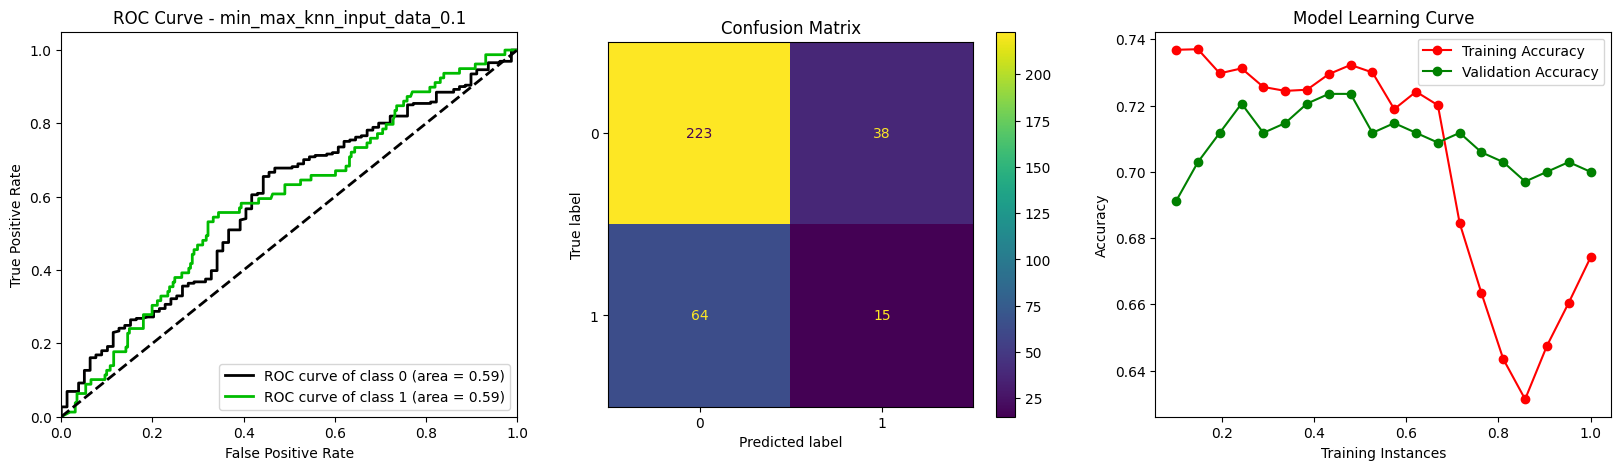

----------------------------------------------------------------------------------------------------
Running for: min_max_iterative_input_data_0.1

Train Accuracy Score: 0.674, Test Accuracy Score: 0.703
ROC Score: 0.604
Precision: 0.323, Recall: 0.253, F1-Score: 0.284

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       261
           1       0.32      0.25      0.28        79

    accuracy                           0.70       340
   macro avg       0.56      0.55      0.55       340
weighted avg       0.68      0.70      0.69       340



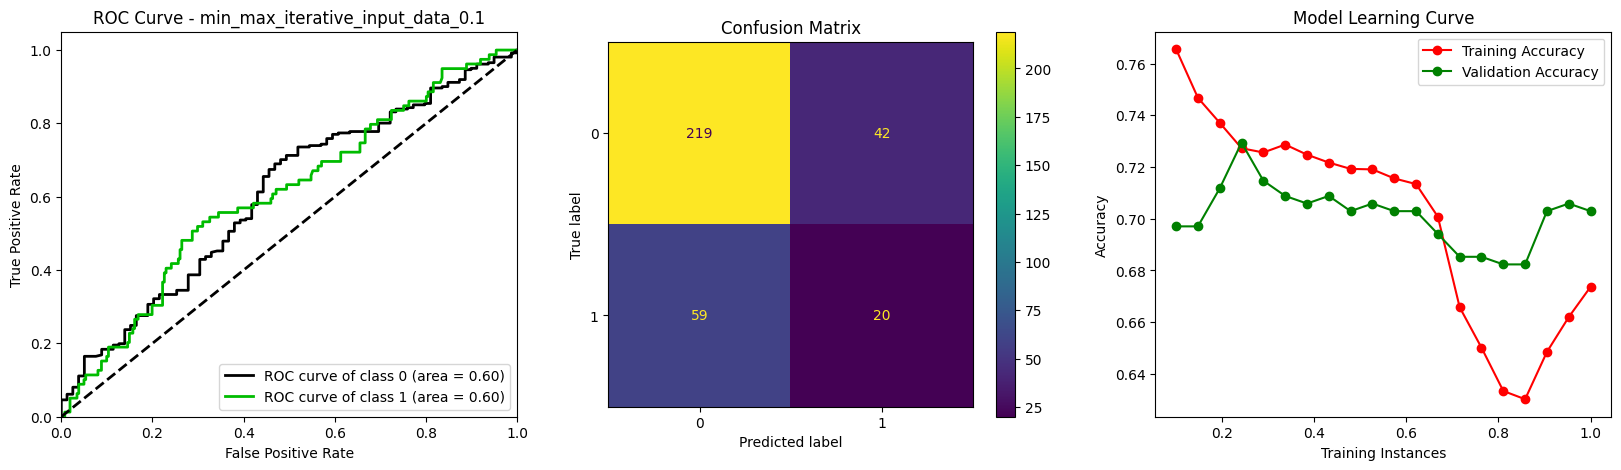

----------------------------------------------------------------------------------------------------
Running for: robust_simple_mean_input_data_0.1

Train Accuracy Score: 0.681, Test Accuracy Score: 0.665
ROC Score: 0.619
Precision: 0.303, Recall: 0.342, F1-Score: 0.321

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       261
           1       0.30      0.34      0.32        79

    accuracy                           0.66       340
   macro avg       0.55      0.55      0.55       340
weighted avg       0.68      0.66      0.67       340



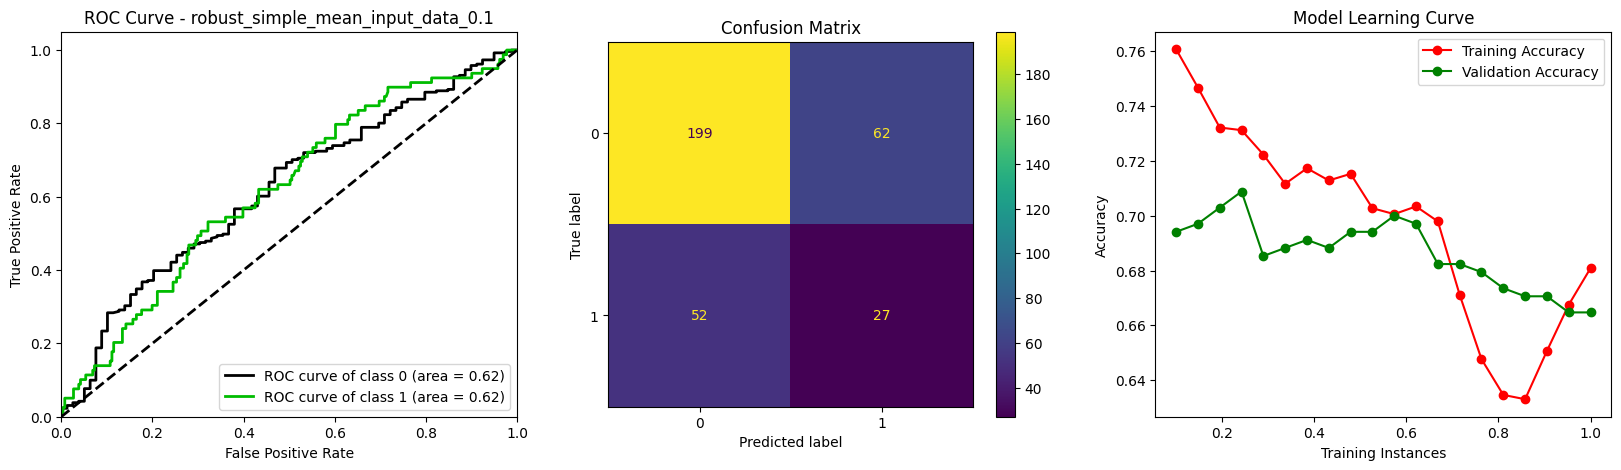

----------------------------------------------------------------------------------------------------
Running for: robust_simple_median_input_data_0.1

Train Accuracy Score: 0.686, Test Accuracy Score: 0.674
ROC Score: 0.603
Precision: 0.278, Recall: 0.253, F1-Score: 0.265

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       261
           1       0.28      0.25      0.26        79

    accuracy                           0.67       340
   macro avg       0.53      0.53      0.53       340
weighted avg       0.66      0.67      0.67       340



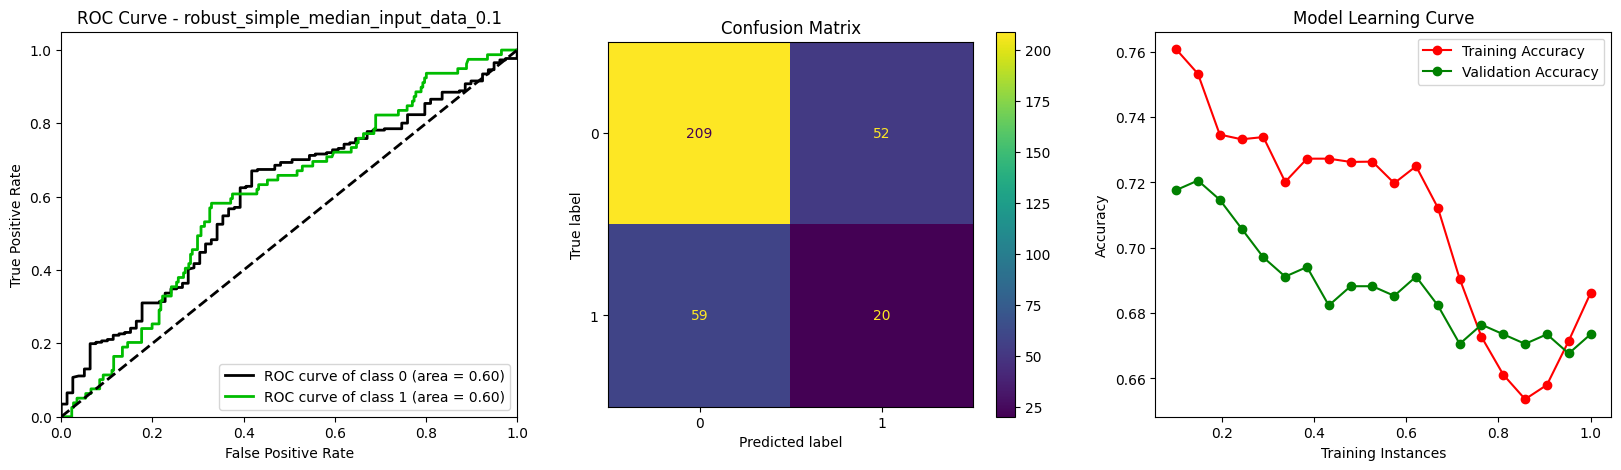

----------------------------------------------------------------------------------------------------
Running for: robust_simple_most_frequent_input_data_0.1

Train Accuracy Score: 0.686, Test Accuracy Score: 0.674
ROC Score: 0.603
Precision: 0.278, Recall: 0.253, F1-Score: 0.265

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       261
           1       0.28      0.25      0.26        79

    accuracy                           0.67       340
   macro avg       0.53      0.53      0.53       340
weighted avg       0.66      0.67      0.67       340



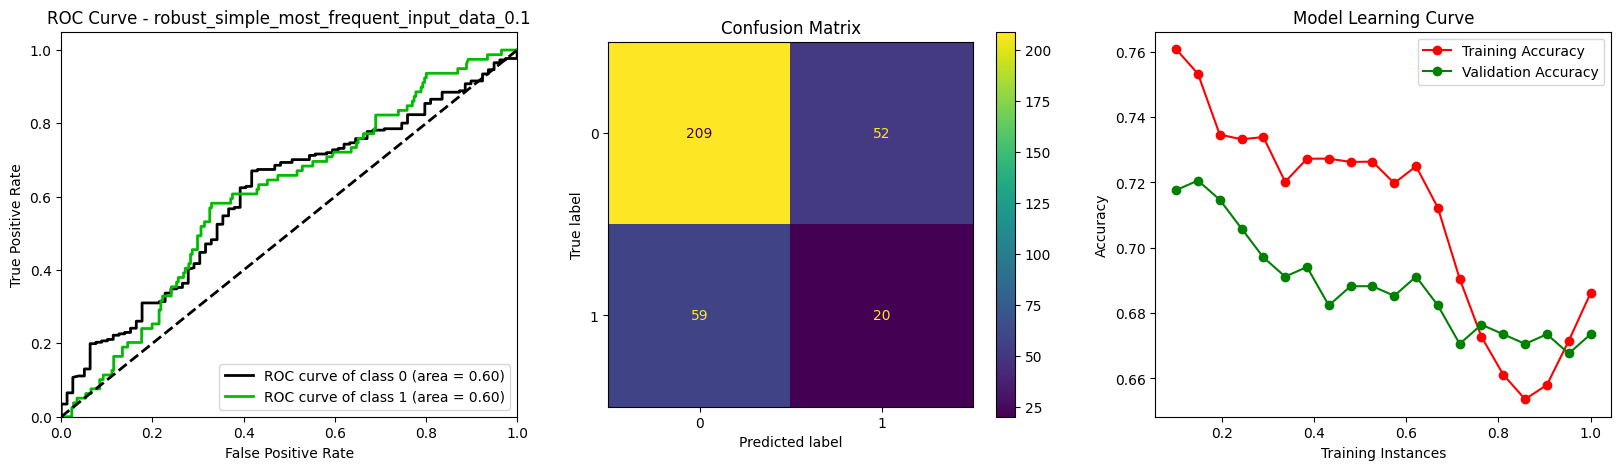

----------------------------------------------------------------------------------------------------
Running for: robust_knn_input_data_0.1

Train Accuracy Score: 0.674, Test Accuracy Score: 0.7
ROC Score: 0.59
Precision: 0.283, Recall: 0.19, F1-Score: 0.227

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       261
           1       0.28      0.19      0.23        79

    accuracy                           0.70       340
   macro avg       0.53      0.52      0.52       340
weighted avg       0.66      0.70      0.68       340



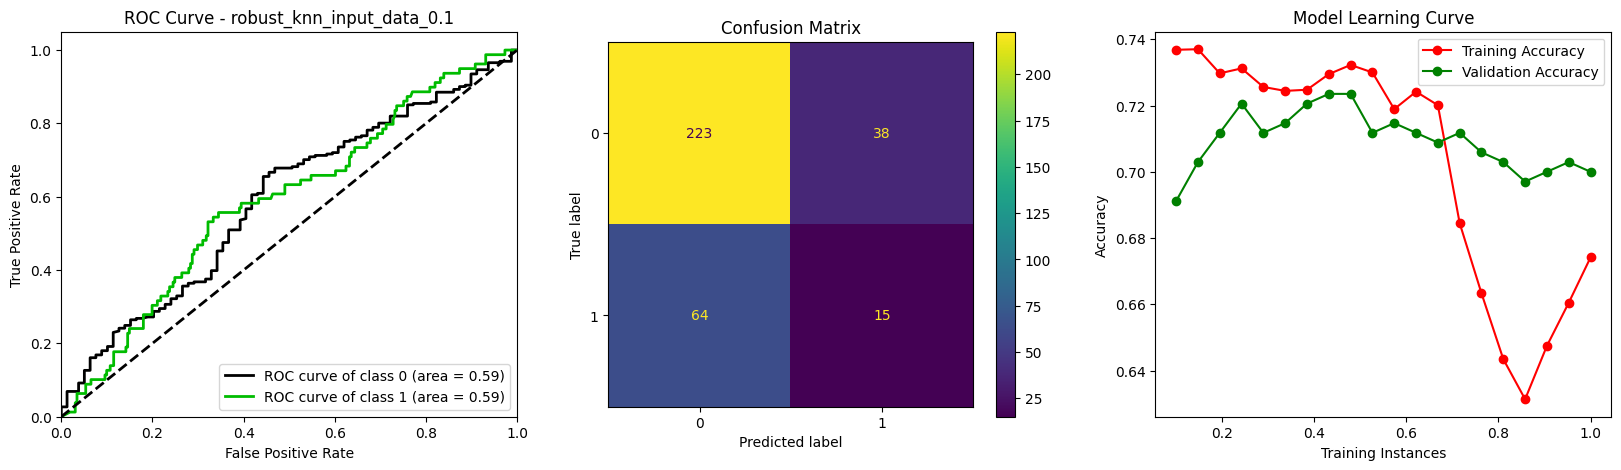

----------------------------------------------------------------------------------------------------
Running for: robust_iterative_input_data_0.1

Train Accuracy Score: 0.674, Test Accuracy Score: 0.703
ROC Score: 0.604
Precision: 0.323, Recall: 0.253, F1-Score: 0.284

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       261
           1       0.32      0.25      0.28        79

    accuracy                           0.70       340
   macro avg       0.56      0.55      0.55       340
weighted avg       0.68      0.70      0.69       340



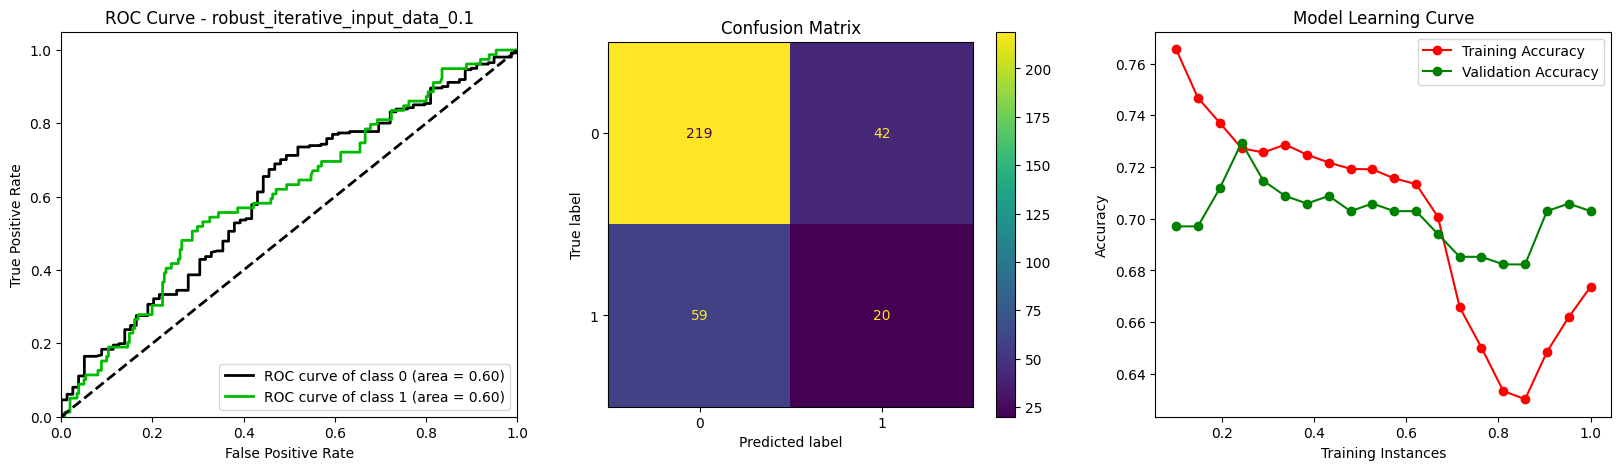

----------------------------------------------------------------------------------------------------


In [66]:
for data_key, dataset_dict in classifier_dict.items():
    print(f'Running for: {data_key}\n')

    model_object = dataset_dict['model_object']

    y_pred_train = model_object.predict(dataset_dict['X_train'])

    y_pred = model_object.predict(dataset_dict['X_test'])
    y_pred_prob = model_object.predict_proba(dataset_dict['X_test'])[:, 1]

    accuracy = accuracy_score(dataset_dict['y_test'], y_pred)
    accuracy_train = accuracy_score(dataset_dict['y_train'], y_pred_train)

    precision, recall, f1_score, _ = precision_recall_fscore_support(dataset_dict['y_test'], y_pred, average='binary')

    roc_score = roc_auc_score(dataset_dict['y_test'], y_pred_prob)

    print(f'Train Accuracy Score: {accuracy_train:.3}, Test Accuracy Score: {accuracy:.3}')
    print(f'ROC Score: {roc_score:.3}')
    print(f'Precision: {precision:.3}, Recall: {recall:.3}, F1-Score: {f1_score:.3}\n')

    print(f'Classification Report: \n {classification_report(dataset_dict["y_test"], y_pred)}')

    train_sizes = np.linspace(0.1, 1.0, 20)
    train_acc_scores, test_acc_scores = [], []

    X_train = dataset_dict['X_train']
    y_train = dataset_dict['y_train']
    X_test = dataset_dict['X_test']
    y_test = dataset_dict['y_test']

    for size in train_sizes:
        model = GaussianNB()

        X_train_subset, y_train_subset = X_train[:int(size * len(X_train))], y_train[:int(size * len(X_train))]
        model.fit(X_train_subset, y_train_subset)

        y_train_pred = model.predict(X_train_subset)
        y_test_pred = model.predict(X_test)

        train_acc_scores.append(accuracy_score(y_train_subset, y_train_pred))
        test_acc_scores.append(accuracy_score(y_test, y_test_pred))

    _, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    plot_roc(dataset_dict['y_test'], model_object.predict_proba(dataset_dict['X_test']), title=f'ROC Curve - {data_key}', plot_macro=False, plot_micro=False, ax=ax[0])

    confusion_matrix_data = confusion_matrix(dataset_dict['y_test'], y_pred)

    cf_disp = ConfusionMatrixDisplay(confusion_matrix_data)
    cf_disp.plot(ax=ax[1])
    ax[1].set_title('Confusion Matrix')

    ax[2].plot(train_sizes, train_acc_scores, 'o-', color="r", label="Training Accuracy")
    ax[2].plot(train_sizes, test_acc_scores, 'o-', color="g", label="Validation Accuracy")
    ax[2].set_xlabel("Training Instances")
    ax[2].set_ylabel("Accuracy")
    ax[2].set_title("Model Learning Curve")
    ax[2].legend(loc="best")

    plt.show()

    print('-' * 100)